In [2]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table
import pandas as pd
from astropy.table import unique, join
from sklearn.preprocessing import minmax_scale
from scipy.stats import skew, kurtosis
from astropy.timeseries import LombScargle

In [3]:
from source_names_dict import source_names_dict, source_names_w_counterparts, source_names_readable
from get_closest_srcreg import get_src_region_dict
from uvot import read_uvotsource, calc_uvot_flags, filters, filter_colors, filter_markers
from xrt import load_xrt, rename_xrt_cols
from lightcurve import LightCurve

In [4]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [5]:
src_region_dict = get_src_region_dict()

Getting source region dict


In [6]:
source_names_readable

{'ESO_243-49_HLX-1': 'ESO 243-49 HLX-1',
 'NAME_Holmberg_IX_X-1': 'Holmberg IX X-1',
 'Holmberg_II_X-1': 'Holmberg II X-1',
 'M31_ULX-1': 'M31 ULX-1',
 '[LM2005]_NGC_598_ULX1': 'M33 ULX-1',
 'RX_J133001+47137': 'M51 ULX-7',
 '[LM2005]_NGC_3031_ULX1': 'M81 X-6',
 'M82_X-2': 'M82 X-2',
 '[LM2005]_NGC_1042_ULX1': 'NGC1042 ULX-1',
 'NAME_NGC_1313_X-1': 'NGC1313 X-1',
 'NAME_NGC_1313_X-2': 'NGC1313 X-2',
 '[LM2005]_NGC_247_ULX1': 'NGC247 ULX-1',
 '[LB2005]_NGC_253_X2': 'NGC253 X-2',
 '[LB2005]_NGC_253_X9': 'NGC253 X-9',
 'NAME_NGC_300_ULX1': 'NGC300 ULX-1',
 '[LM2005]_NGC_4395_ULX1': 'NGC4395 ULX-1',
 '[LM2005]_NGC_5204_ULX1': 'NGC5204 ULX-1',
 '[LM2005]_NGC_5408_ULX1': 'NGC5408 ULX-1',
 '[SRW2006b]_NGC_55_ULX': 'NGC55 ULX',
 '[SST2011]_J141939.39+564137.8': 'NGC5585 ULX',
 'NAME_NGC_5907_ULX': 'NGC5907 ULX',
 '[LB2005]_NGC_6946_ULX1': 'NGC6946 ULX-1',
 '[LB2005]_NGC_6946_ULX3': 'NGC6946 ULX-3',
 'NAME_NGC_7090_ULX3': 'NGC7090 ULX-3',
 'NAME_NGC_7793_P13': 'NGC7793 P13',
 'NAME_NGC_925_ULX-

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.21 freq=1.61e-02 p=61.98 fap=0.03
pow=0.18 freq=3.66e-01 p=2.73 fap=0.07
pow=0.17 freq=9.36e-01 p=1.07 fap=0.09
LS success


<Figure size 1440x288 with 0 Axes>

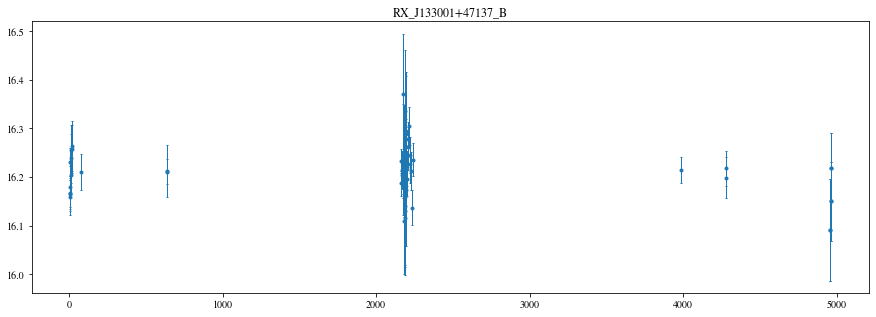

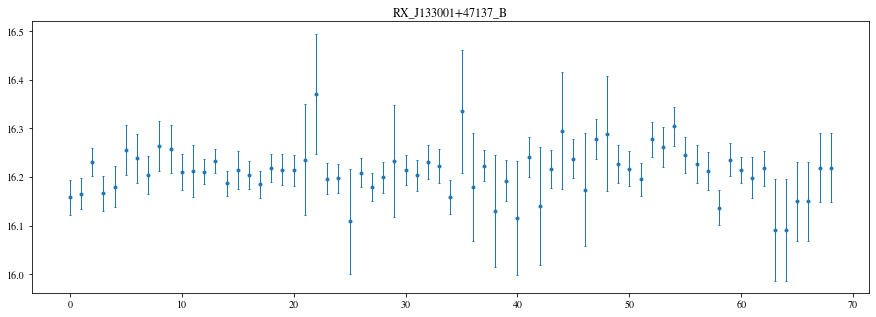

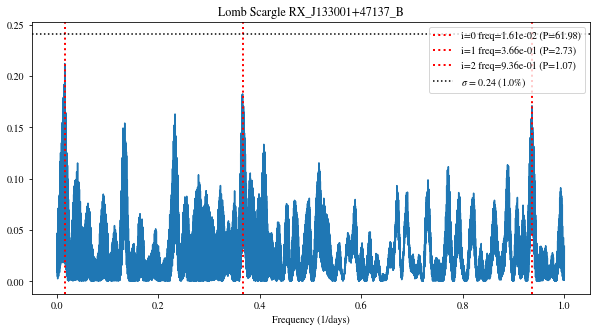

{'ndata': 69, 'mean': 16.210451, 'std': 0.05093416, 'max': 16.371296, 'min': 16.091143, 'max/min': 1.0174104, 'sigma_xs': -0.0014317581544805698, 'F_var': nan, 'kurtosis': 1.091494514212644, 'von_neumann': 1.660461890381807, 'skew': 0.18037622224136826, 't_diff_max': 1751.9840505163156, 't_diff_min': 0.0, 't_diff_mean': 72.88165857836665, 'y_diff_max': 0.17731667, 'y_diff_min': -0.17444229, 'y_diff_mean': 0.0008926111, 'ls_z_fal': <Quantity 0.24068185>, 'ls_pow[0]': 0.21194106851468078, 'ls_freq[0]': 0.016133316090558517, 'ls_period[0]': 61.983537320341505, 'ls_fap[0]': 0.028000000000000025, 'ls_pow[1]': 0.18237650852957502, 'ls_freq[1]': 0.36637878369044485, 'ls_period[1]': 2.729415688122663, 'ls_fap[1]': 0.06999999999999995, 'ls_pow[2]': 0.17082062463857942, 'ls_freq[2]': 0.9362389343965164, 'ls_period[2]': 1.068103411705029, 'ls_fap[2]': 0.09199999999999997, 'simbad_name': 'RX_J133001+47137', 'readable_name': 'M51 ULX-7', 'FILTER': 'B'}
Calculating Lomb scargle periodogram using aut

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.17 freq=5.01e-03 p=199.55 fap=0.02
pow=0.17 freq=8.52e-01 p=1.17 fap=0.02
Error RX_J133001+47137 <class 'filter'>
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
Error RX_J133001+47137 <class 'filter'>
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
Error RX_J133001+47137 <class 'filter'>
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
Error RX_J133001+47137 <class 'filter'>
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
Error RX_J133001+47137 <class 'filter'>


Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
No peaks found
LS failed


<Figure size 1440x288 with 0 Axes>

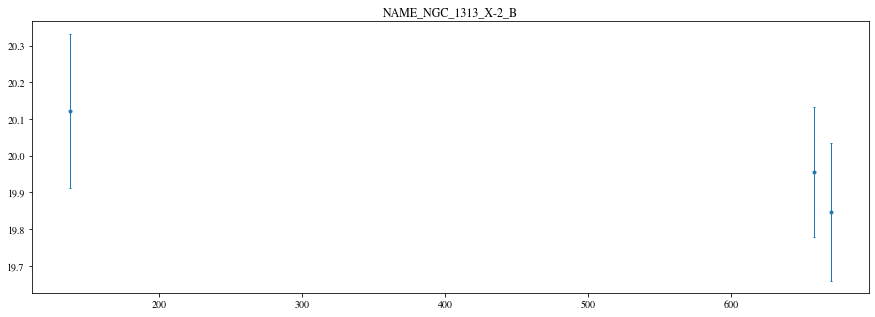

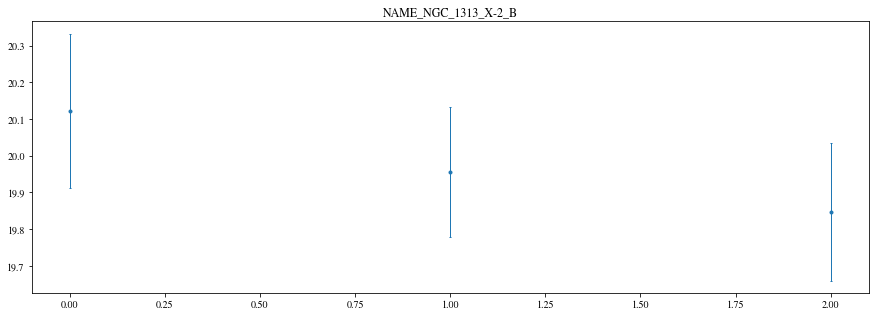

{'ndata': 3, 'mean': 19.975054, 'std': 0.113492206, 'max': 20.122791, 'min': 19.846863, 'max/min': 1.0139029, 'sigma_xs': -0.01754320226609707, 'F_var': nan, 'kurtosis': -1.5000057338905621, 'von_neumann': 1.5444993247078826, 'skew': 0.25323194574277114, 't_diff_max': 520.2589558134277, 't_diff_min': 11.729886057408294, 't_diff_mean': 265.994420935418, 'y_diff_max': -0.10864258, 'y_diff_min': -0.16728592, 'y_diff_mean': -0.13796425, 'ls_z_fal': None, 'ls_pow[0]': None, 'ls_freq[0]': None, 'ls_period[0]': None, 'ls_fap[0]': None, 'ls_pow[1]': None, 'ls_freq[1]': None, 'ls_period[1]': None, 'ls_fap[1]': None, 'ls_pow[2]': None, 'ls_freq[2]': None, 'ls_period[2]': None, 'ls_fap[2]': None, 'simbad_name': 'NAME_NGC_1313_X-2', 'readable_name': 'NGC1313 X-2', 'FILTER': 'B'}
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
Error NAME_NGC_1313_X-2 <class 'filter'>
Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequ

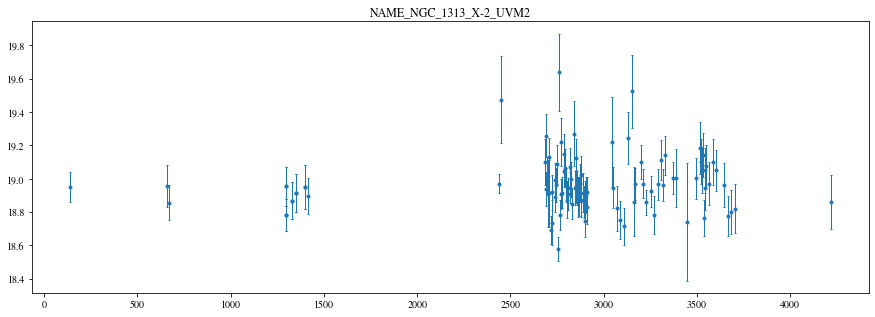

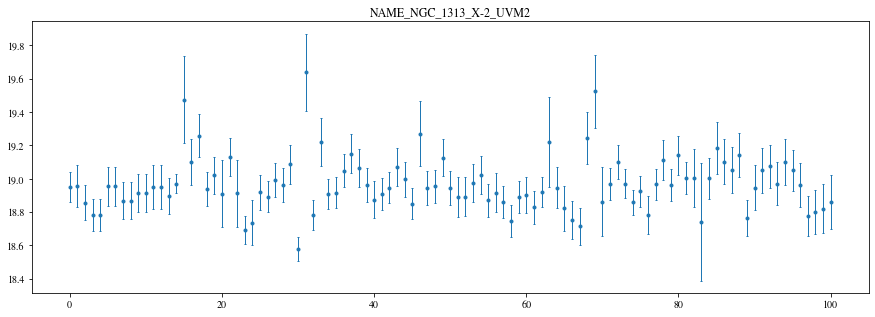

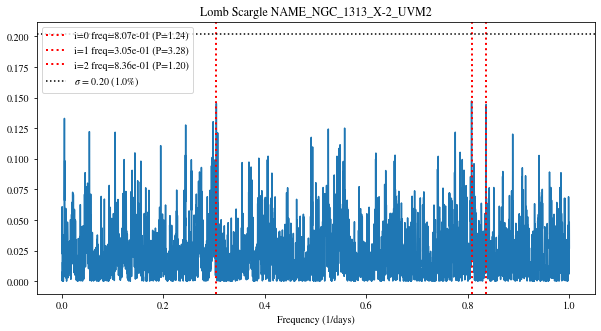

{'ndata': 101, 'mean': 18.966955, 'std': 0.16478504, 'max': 19.638954, 'min': 18.57779, 'max/min': 1.0571201, 'sigma_xs': 0.01028358786929362, 'F_var': 0.00534656330773393, 'kurtosis': 3.1552450366225813, 'von_neumann': 1.9877455815690386, 'skew': 1.2291731621110378, 't_diff_max': 1028.219430301273, 't_diff_min': 0.0, 't_diff_mean': 40.78503651334729, 'y_diff_max': 1.0611649, 'y_diff_min': -0.85933685, 'y_diff_mean': -0.00090272905, 'ls_z_fal': <Quantity 0.20196044>, 'ls_pow[0]': 0.14719575992619593, 'ls_freq[0]': 0.8074232084047892, 'ls_period[0]': 1.2385078724398833, 'ls_fap[0]': 0.19399999999999995, 'ls_pow[1]': 0.14521538501660022, 'ls_freq[1]': 0.304836923032902, 'ls_period[1]': 3.2804425069336727, 'ls_fap[1]': 0.19799999999999995, 'ls_pow[2]': 0.1443200659101751, 'ls_freq[2]': 0.8360121248231529, 'ls_period[2]': 1.1961549005183825, 'ls_fap[2]': 0.18899999999999995, 'simbad_name': 'NAME_NGC_1313_X-2', 'readable_name': 'NGC1313 X-2', 'FILTER': 'UVM2'}
Calculating Lomb scargle perio

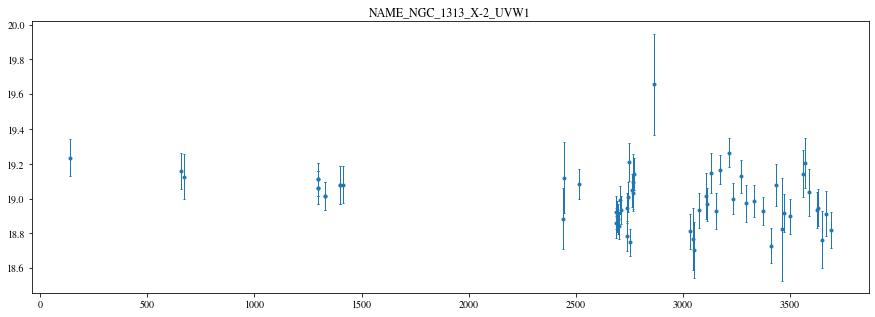

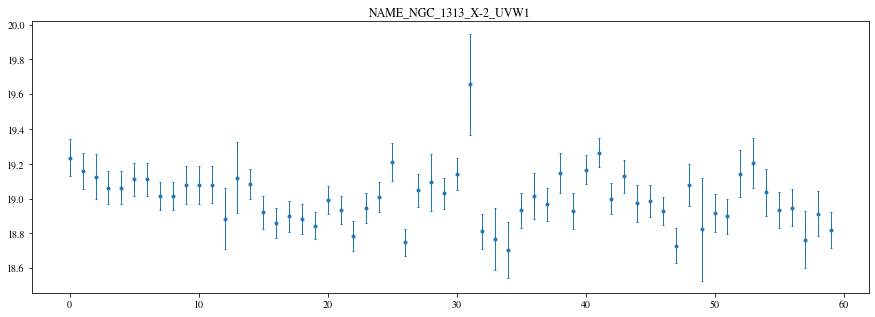

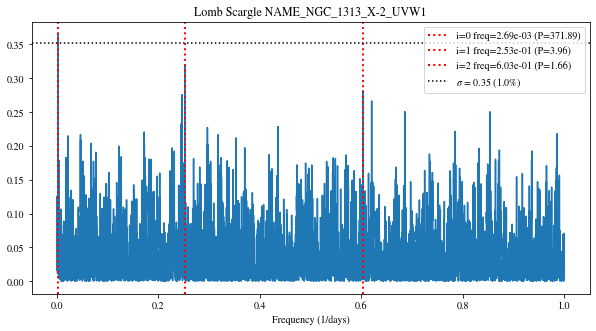

{'ndata': 60, 'mean': 19.001959, 'std': 0.15823755, 'max': 19.656038, 'min': 18.70572, 'max/min': 1.0508035, 'sigma_xs': 0.010618204375108083, 'F_var': 0.005422844695896982, 'kurtosis': 3.094343666077771, 'von_neumann': 1.55596099006697, 'skew': 0.9268801616124677, 't_diff_max': 1027.1913395837983, 't_diff_min': 0.0, 't_diff_mean': 60.210263262033116, 'y_diff_max': 0.51483345, 'y_diff_min': -0.84409904, 'y_diff_mean': -0.0070255734, 'ls_z_fal': <Quantity 0.35281681>, 'ls_pow[0]': 0.36536059859544273, 'ls_freq[0]': 0.0026889963561804123, 'ls_period[0]': 371.8859632150826, 'ls_fap[0]': 0.0030000000000000027, 'ls_pow[1]': 0.31924354163959096, 'ls_freq[1]': 0.2527167569494208, 'ls_period[1]': 3.9569991799164383, 'ls_fap[1]': 0.017000000000000015, 'ls_pow[2]': 0.2814500313423868, 'ls_freq[2]': 0.6033524004924744, 'ls_period[2]': 1.6574061844848382, 'ls_fap[2]': 0.06299999999999994, 'simbad_name': 'NAME_NGC_1313_X-2', 'readable_name': 'NGC1313 X-2', 'FILTER': 'UVW1'}
Calculating Lomb scargle

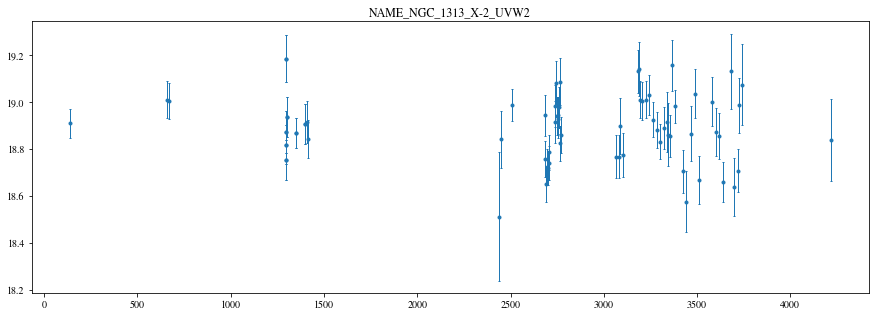

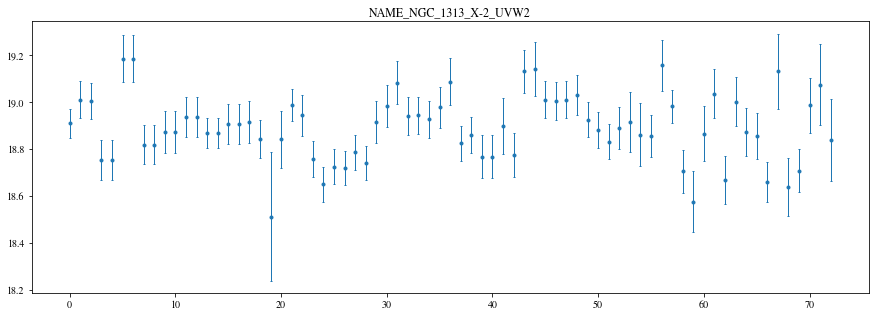

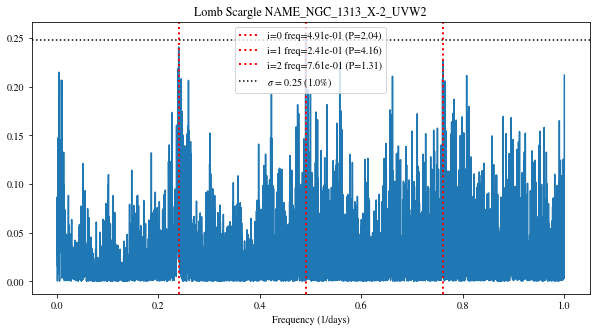

{'ndata': 73, 'mean': 18.88993, 'std': 0.14201595, 'max': 19.184526, 'min': 18.511398, 'max/min': 1.0363629, 'sigma_xs': 0.010418227809953363, 'F_var': 0.005403393047003554, 'kurtosis': -0.08445135738535026, 'von_neumann': 1.5944209629196318, 'skew': -0.12599832078912618, 't_diff_max': 1025.6584196167823, 't_diff_min': 0.0, 't_diff_mean': 56.6432860481017, 'y_diff_max': 0.4727745, 'y_diff_min': -0.4924202, 'y_diff_mean': -0.0009786023, 'ls_z_fal': <Quantity 0.24729306>, 'ls_pow[0]': 0.25387554581249283, 'ls_freq[0]': 0.4905156992521804, 'ls_period[0]': 2.038670732709591, 'ls_fap[0]': 0.013000000000000012, 'ls_pow[1]': 0.24054414083221626, 'ls_freq[1]': 0.240510586570592, 'ls_period[1]': 4.157821134856744, 'ls_fap[1]': 0.027000000000000024, 'ls_pow[2]': 0.2273926488543565, 'ls_freq[2]': 0.7606271470062387, 'ls_period[2]': 1.3147045880966932, 'ls_fap[2]': 0.04800000000000004, 'simbad_name': 'NAME_NGC_1313_X-2', 'readable_name': 'NGC1313 X-2', 'FILTER': 'UVW2'}
Calculating Lomb scargle pe

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


No peaks found
LS failed


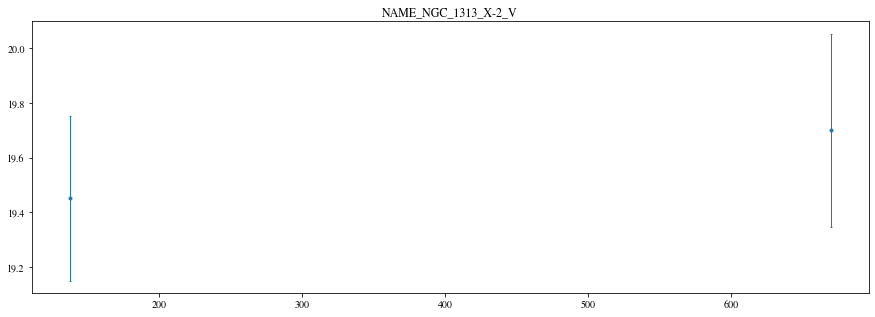

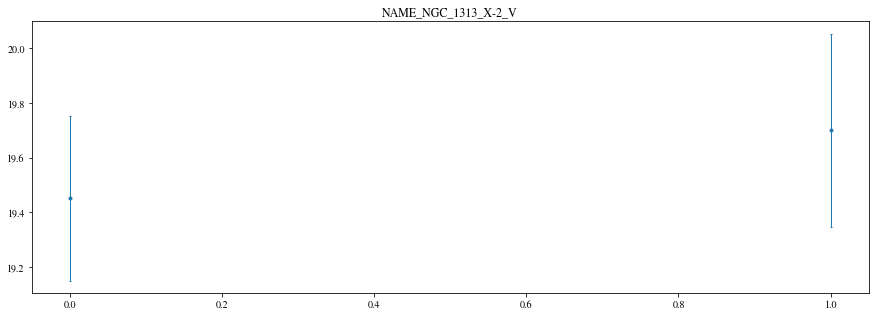

{'ndata': 2, 'mean': 19.575457, 'std': 0.12412262, 'max': 19.69958, 'min': 19.451334, 'max/min': 1.0127624, 'sigma_xs': -0.07706020213663578, 'F_var': nan, 'kurtosis': -2.0000000044001416, 'von_neumann': 4.0, 'skew': 0.0, 't_diff_max': 531.985715302777, 't_diff_min': 531.985715302777, 't_diff_mean': 531.985715302777, 'y_diff_max': 0.24824524, 'y_diff_min': 0.24824524, 'y_diff_mean': 0.24824524, 'ls_z_fal': None, 'ls_pow[0]': None, 'ls_freq[0]': None, 'ls_period[0]': None, 'ls_fap[0]': None, 'ls_pow[1]': None, 'ls_freq[1]': None, 'ls_period[1]': None, 'ls_fap[1]': None, 'ls_pow[2]': None, 'ls_freq[2]': None, 'ls_period[2]': None, 'ls_fap[2]': None, 'simbad_name': 'NAME_NGC_1313_X-2', 'readable_name': 'NGC1313 X-2', 'FILTER': 'V'}


/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.30 freq=9.63e-01 p=1.04 fap=0.00
pow=0.26 freq=5.92e-01 p=1.69 fap=0.01
pow=0.24 freq=4.67e-01 p=2.14 fap=0.02
LS success


<Figure size 1440x288 with 0 Axes>

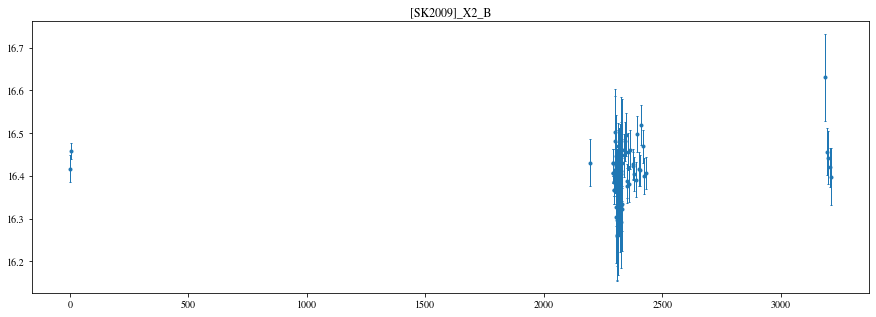

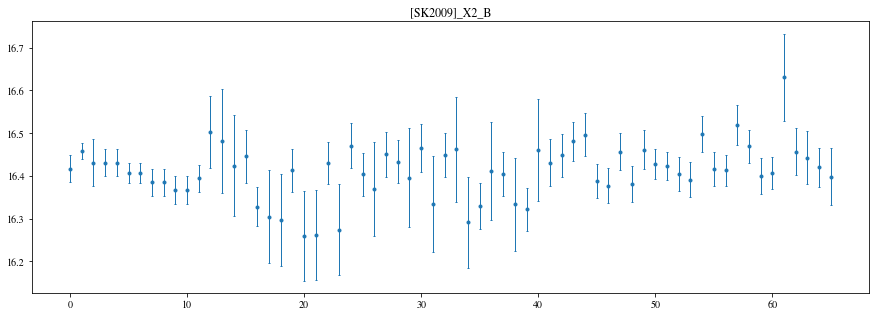

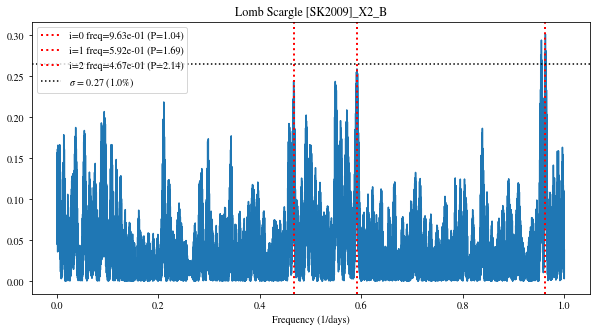

{'ndata': 66, 'mean': 16.41122, 'std': 0.064346425, 'max': 16.630505, 'min': 16.260271, 'max/min': 1.0227692, 'sigma_xs': -0.00041165019413738537, 'F_var': nan, 'kurtosis': 1.3004194193017744, 'von_neumann': 1.5859600350506349, 'skew': -0.04243962705525784, 't_diff_max': 2194.3017402137702, 't_diff_min': 0.0, 't_diff_mean': 49.41835404114849, 'y_diff_max': 0.22342682, 'y_diff_min': -0.17385674, 'y_diff_mean': -0.00027955862, 'ls_z_fal': <Quantity 0.2650791>, 'ls_pow[0]': 0.30165714647022773, 'ls_freq[0]': 0.9627105783527494, 'ls_period[0]': 1.038733781975321, 'ls_fap[0]': 0.0030000000000000027, 'ls_pow[1]': 0.25909921316634577, 'ls_freq[1]': 0.5915622708582047, 'ls_period[1]': 1.6904391122666718, 'ls_fap[1]': 0.013000000000000012, 'ls_pow[2]': 0.24428770423406584, 'ls_freq[2]': 0.46691222697226625, 'ls_period[2]': 2.1417301630428245, 'ls_fap[2]': 0.018000000000000016, 'simbad_name': '[SK2009]_X2', 'readable_name': 'NGC1365 X-2', 'FILTER': 'B'}
Calculating Lomb scargle periodogram using

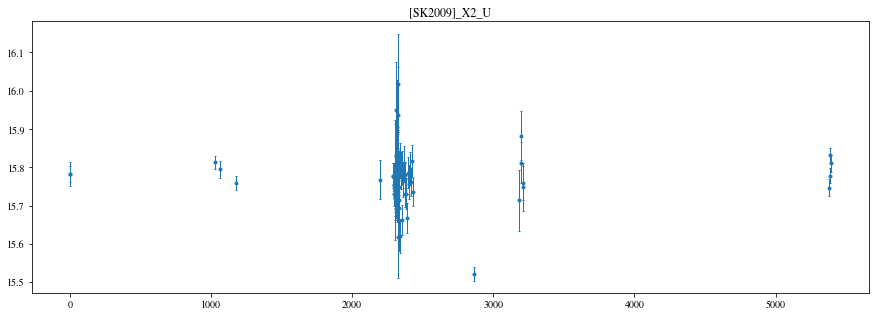

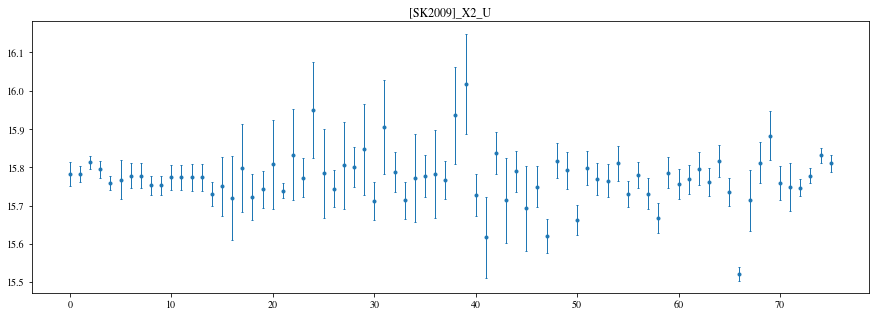

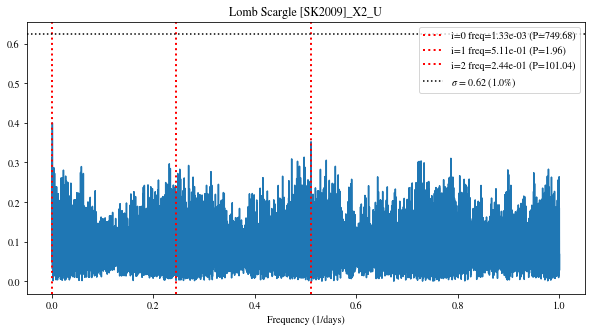

{'ndata': 76, 'mean': 15.77193, 'std': 0.068510346, 'max': 16.018288, 'min': 15.520921, 'max/min': 1.0320449, 'sigma_xs': 0.0003806788621372303, 'F_var': 0.0012370707761670252, 'kurtosis': 3.8159640696909607, 'von_neumann': 1.8543652538260131, 'skew': 0.12144548737507113, 't_diff_max': 2166.051374509145, 't_diff_min': 0.0, 't_diff_mean': 71.87896543394135, 'y_diff_max': 0.21959591, 'y_diff_min': -0.29014206, 'y_diff_mean': 0.00037821452, 'ls_z_fal': <Quantity 0.62381865>, 'ls_pow[0]': 0.39949154433765144, 'ls_freq[0]': 0.001333894622092977, 'ls_period[0]': 749.6844079264131, 'ls_fap[0]': 0.08299999999999996, 'ls_pow[1]': 0.35186990717110683, 'ls_freq[1]': 0.5107457897286115, 'ls_period[1]': 1.9579211813598254, 'ls_fap[1]': 0.14800000000000002, 'ls_pow[2]': 0.46691222697226625, 'ls_freq[2]': 0.24428770423406584, 'ls_period[2]': 101.03605651855469, 'ls_fap[2]': 100.0, 'simbad_name': '[SK2009]_X2', 'readable_name': 'NGC1365 X-2', 'FILTER': 'U'}
Calculating Lomb scargle periodogram using a

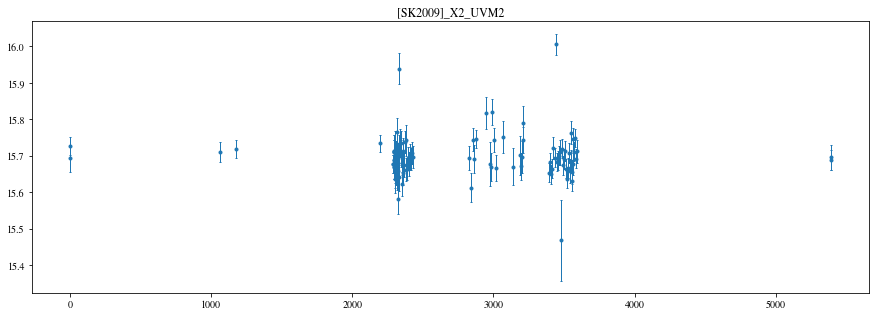

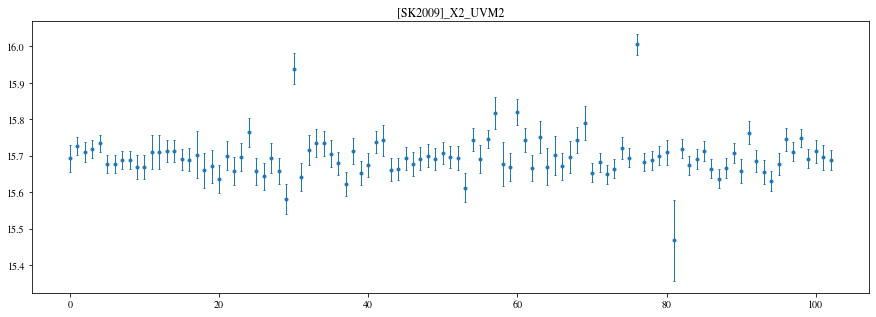

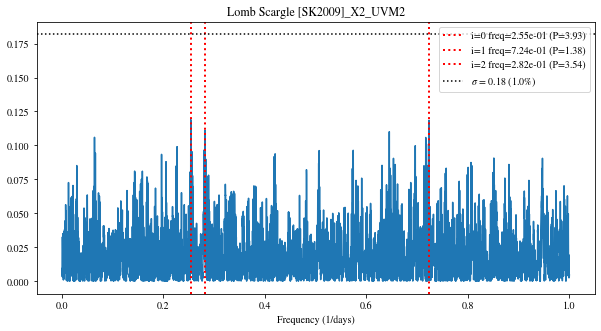

{'ndata': 103, 'mean': 15.697286, 'std': 0.058825288, 'max': 16.005644, 'min': 15.468107, 'max/min': 1.0347513, 'sigma_xs': 0.0021860566130360065, 'F_var': 0.002978558546286713, 'kurtosis': 10.060556180683914, 'von_neumann': 2.244259815385251, 'skew': 1.5508203314901066, 't_diff_max': 1795.822203337506, 't_diff_min': 0.0, 't_diff_mean': 52.83197289722682, 'y_diff_max': 0.35746193, 'y_diff_min': -0.32273293, 'y_diff_mean': -5.7388756e-05, 'ls_z_fal': <Quantity 0.18201956>, 'ls_pow[0]': 0.11895040363859175, 'ls_freq[0]': 0.2545229504511252, 'ls_period[0]': 3.928918780124015, 'ls_fap[0]': 0.21599999999999997, 'ls_pow[1]': 0.11846398580944517, 'ls_freq[1]': 0.7236387598058643, 'ls_period[1]': 1.381904971851255, 'ls_fap[1]': 0.22499999999999998, 'ls_pow[2]': 0.1112047086987994, 'ls_freq[2]': 0.28217257687274555, 'ls_period[2]': 3.5439304948864003, 'ls_fap[2]': 0.30800000000000005, 'simbad_name': '[SK2009]_X2', 'readable_name': 'NGC1365 X-2', 'FILTER': 'UVM2'}
Calculating Lomb scargle period

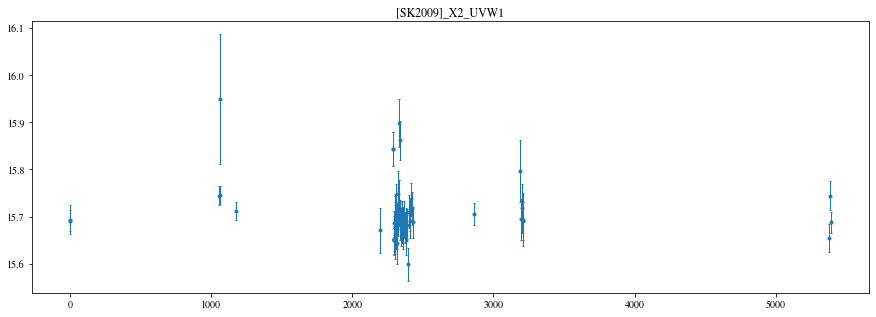

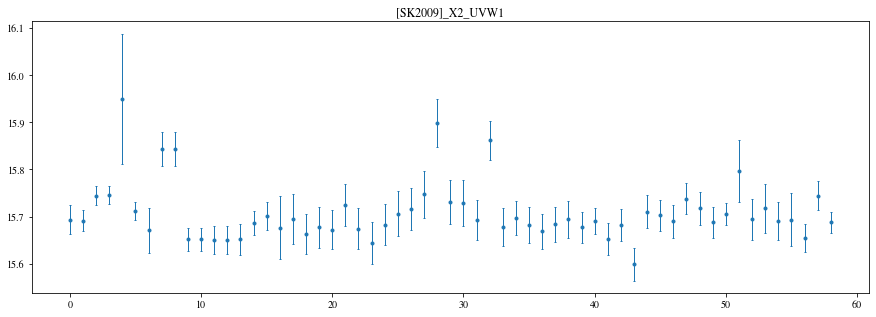

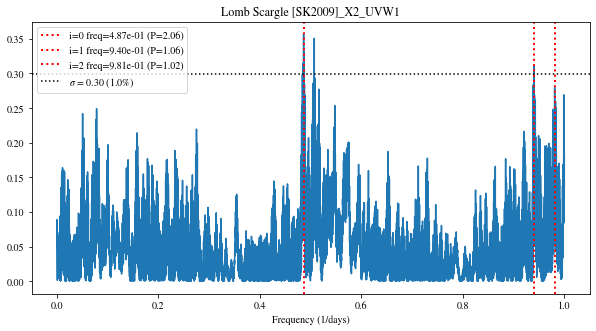

{'ndata': 59, 'mean': 15.708022, 'std': 0.061845902, 'max': 15.9493685, 'min': 15.598555, 'max/min': 1.0224901, 'sigma_xs': 0.002072396869692257, 'F_var': 0.0028981106291213012, 'kurtosis': 4.226988501077587, 'von_neumann': 1.601488325393236, 'skew': 1.9424872292536202, 't_diff_max': 2164.9922024383195, 't_diff_min': 0.0, 't_diff_mean': 92.92180670092998, 'y_diff_max': 0.20314884, 'y_diff_min': -0.23727798, 'y_diff_mean': -0.00010503572, 'ls_z_fal': <Quantity 0.29944318>, 'ls_pow[0]': 0.35665895384457214, 'ls_freq[0]': 0.4865027544680399, 'ls_period[0]': 2.055486820610989, 'ls_fap[0]': 0.0050000000000000044, 'ls_pow[1]': 0.31142894950158523, 'ls_freq[1]': 0.940499597559227, 'ls_period[1]': 1.0632646761308433, 'ls_fap[1]': 0.01100000000000001, 'ls_pow[2]': 0.27923482722943327, 'ls_freq[2]': 0.9809117736362503, 'ls_period[2]': 1.019459677084912, 'ls_fap[2]': 0.02400000000000002, 'simbad_name': '[SK2009]_X2', 'readable_name': 'NGC1365 X-2', 'FILTER': 'UVW1'}
Calculating Lomb scargle perio

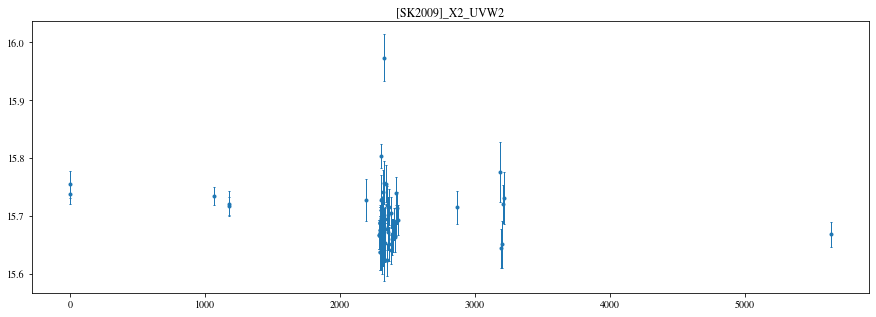

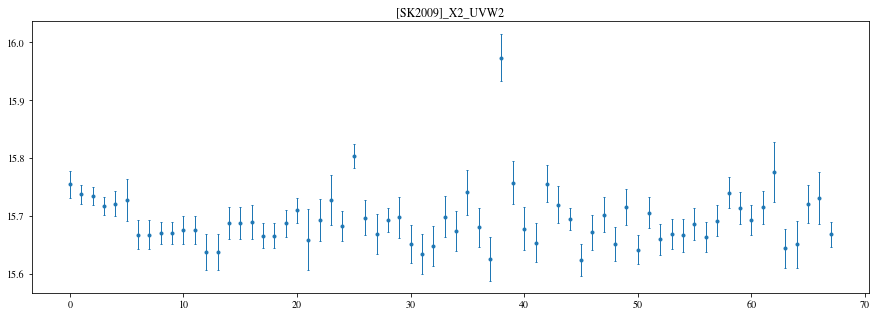

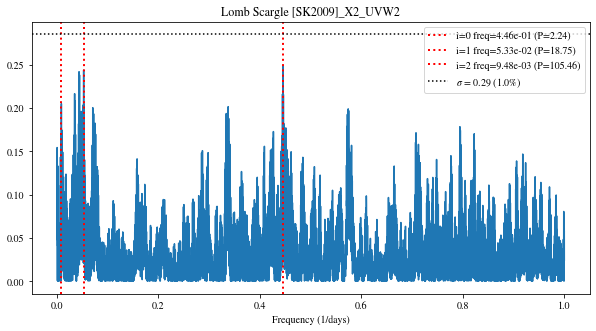

{'ndata': 68, 'mean': 15.693787, 'std': 0.0501873, 'max': 15.9738455, 'min': 15.623359, 'max/min': 1.0224335, 'sigma_xs': 0.0016179660691277068, 'F_var': 0.002563049308691361, 'kurtosis': 12.135947110244711, 'von_neumann': 1.8453644106811793, 'skew': 2.661778573373465, 't_diff_max': 2423.299651899193, 't_diff_min': 0.0, 't_diff_mean': 84.11182896555096, 'y_diff_max': 0.34827232, 'y_diff_min': -0.21666527, 'y_diff_mean': -0.001294321, 'ls_z_fal': <Quantity 0.28515292>, 'ls_pow[0]': 0.24835405294136476, 'ls_freq[0]': 0.4458590752091025, 'ls_period[0]': 2.2428611541236703, 'ls_fap[0]': 0.03200000000000003, 'ls_pow[1]': 0.24358453604215305, 'ls_freq[1]': 0.05334679983513572, 'ls_period[1]': 18.745266878058757, 'ls_fap[1]': 0.026000000000000023, 'ls_pow[2]': 0.20481937584681767, 'ls_freq[2]': 0.009481956041083008, 'ls_period[2]': 105.46347142585806, 'ls_fap[2]': 0.08199999999999996, 'simbad_name': '[SK2009]_X2', 'readable_name': 'NGC1365 X-2', 'FILTER': 'UVW2'}
Calculating Lomb scargle peri

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.17 freq=5.20e-01 p=1.92 fap=0.05
pow=0.15 freq=1.38e-01 p=7.27 fap=0.10
pow=0.14 freq=2.38e-01 p=4.20 fap=0.11
LS success


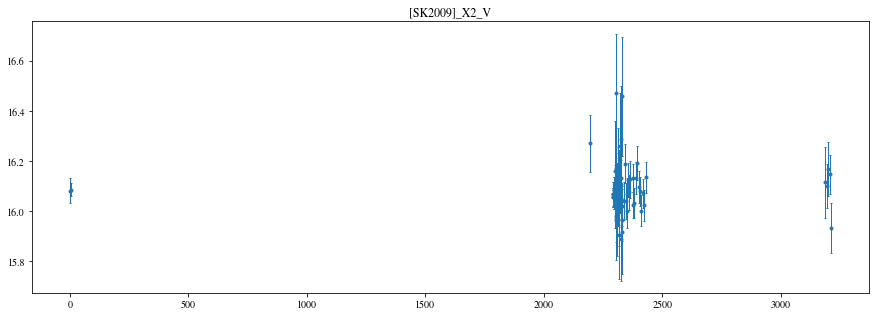

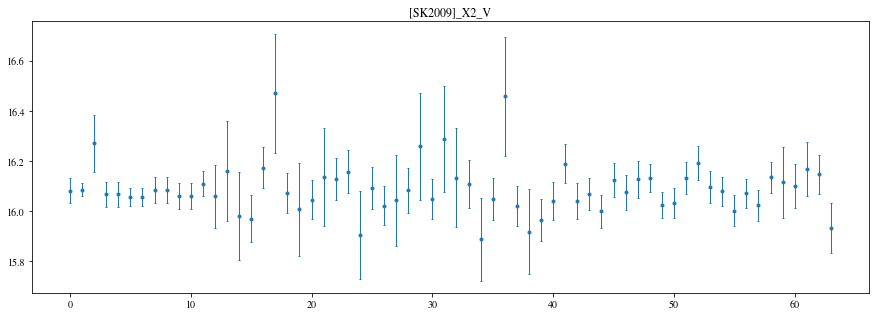

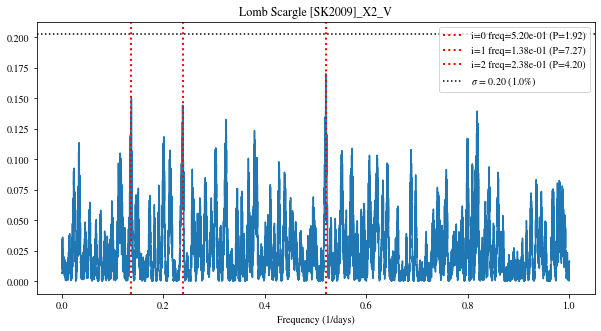

{'ndata': 64, 'mean': 16.090826, 'std': 0.10299504, 'max': 16.470596, 'min': 15.88846, 'max/min': 1.036639, 'sigma_xs': -0.0016358327120542526, 'F_var': nan, 'kurtosis': 3.7078107578178745, 'von_neumann': 1.9842342802030182, 'skew': 1.3570565341224645, 't_diff_max': 2194.3031305658515, 't_diff_min': 0.0, 't_diff_mean': 50.98718256064996, 'y_diff_max': 0.4102459, 'y_diff_min': -0.4378872, 'y_diff_mean': -0.0023510342, 'ls_z_fal': <Quantity 0.20273579>, 'ls_pow[0]': 0.17025044047607504, 'ls_freq[0]': 0.5202092314872636, 'ls_period[0]': 1.9223034492122102, 'ls_fap[0]': 0.04700000000000004, 'ls_pow[1]': 0.14991693406054699, 'ls_freq[1]': 0.13754225262640232, 'ls_period[1]': 7.270493109606393, 'ls_fap[1]': 0.10499999999999998, 'ls_pow[2]': 0.14434412831128482, 'ls_freq[2]': 0.2383456757919953, 'ls_period[2]': 4.195586920874963, 'ls_fap[2]': 0.11199999999999999, 'simbad_name': '[SK2009]_X2', 'readable_name': 'NGC1365 X-2', 'FILTER': 'V'}
Error [SK2009]_X2 <class 'filter'>


Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.45 freq=2.00e-01 p=5.01 fap=0.07
pow=0.42 freq=4.00e-01 p=2.50 fap=0.09
pow=0.37 freq=1.67e-03 p=597.92 fap=0.19
LS success


<Figure size 1440x288 with 0 Axes>

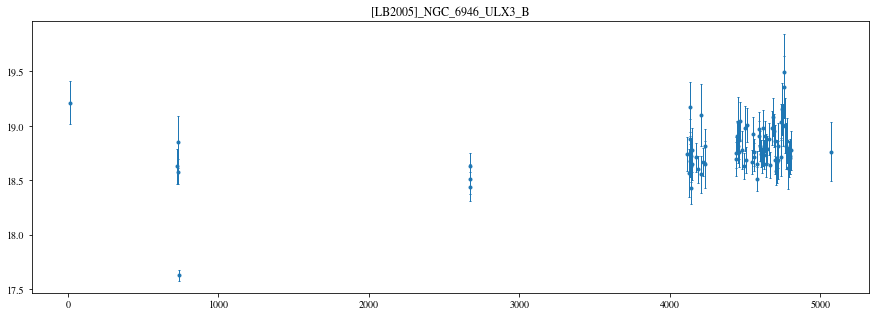

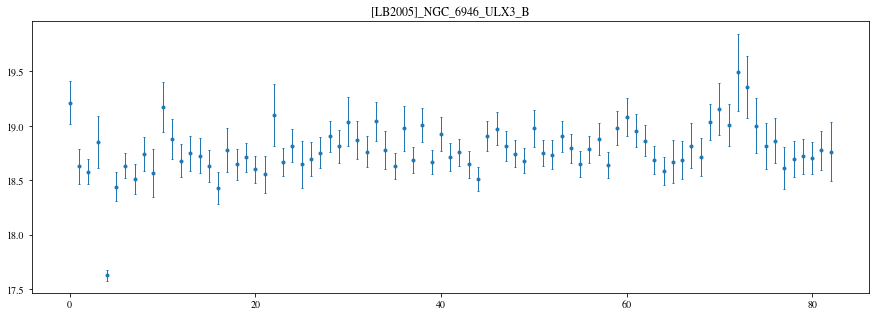

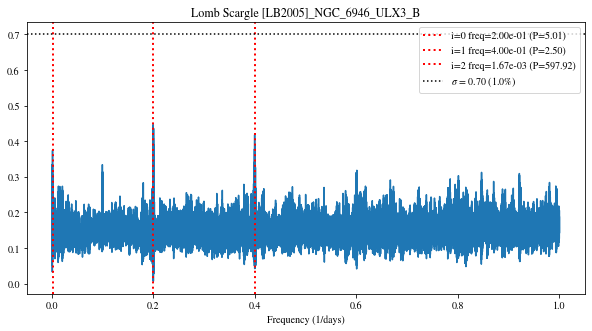

{'ndata': 83, 'mean': 18.783365, 'std': 0.23124287, 'max': 19.492119, 'min': 17.625456, 'max/min': 1.1059072, 'sigma_xs': 0.02496273272547377, 'F_var': 0.008411484709309943, 'kurtosis': 6.842397119280211, 'von_neumann': 1.4100970514490496, 'skew': -0.8258215735024271, 't_diff_max': 1933.931144066206, 't_diff_min': 1.3298924326372799, 't_diff_mean': 61.657624104367066, 'y_diff_max': 0.8162308, 'y_diff_min': -1.2265224, 'y_diff_mean': -0.005484139, 'ls_z_fal': <Quantity 0.70108033>, 'ls_pow[0]': 0.4465073495524515, 'ls_freq[0]': 0.19965800321905897, 'ls_period[0]': 5.00856456479147, 'ls_fap[0]': 0.06899999999999995, 'ls_pow[1]': 0.4182020412148932, 'ls_freq[1]': 0.3997005205983463, 'ls_period[1]': 2.5018731486839534, 'ls_fap[1]': 0.09499999999999997, 'ls_pow[2]': 0.37421472869896666, 'ls_freq[2]': 0.0016724783063966553, 'ls_period[2]': 597.9150797803137, 'ls_fap[2]': 0.19499999999999995, 'simbad_name': '[LB2005]_NGC_6946_ULX3', 'readable_name': 'NGC6946 ULX-3', 'FILTER': 'B'}
Calculating

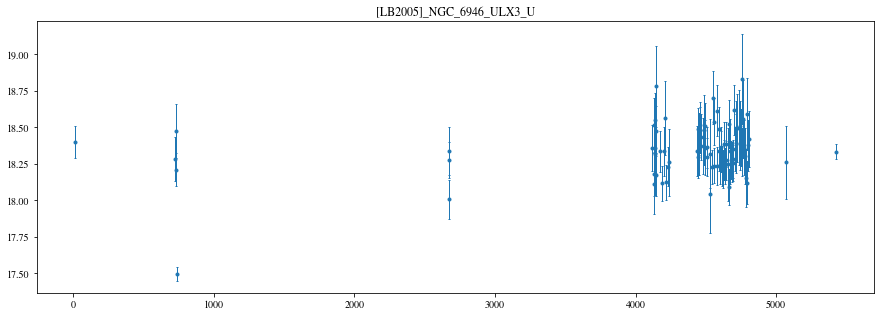

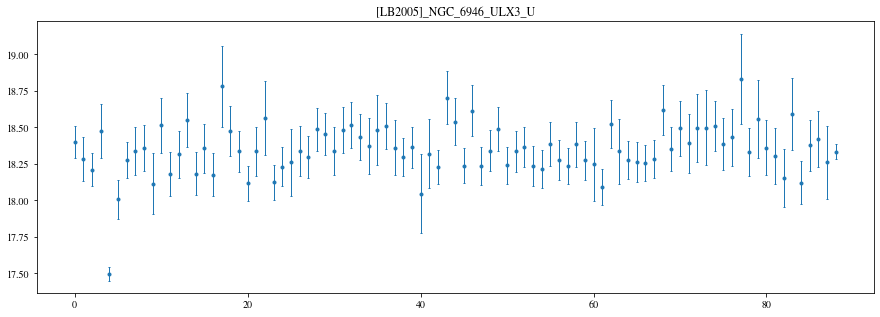

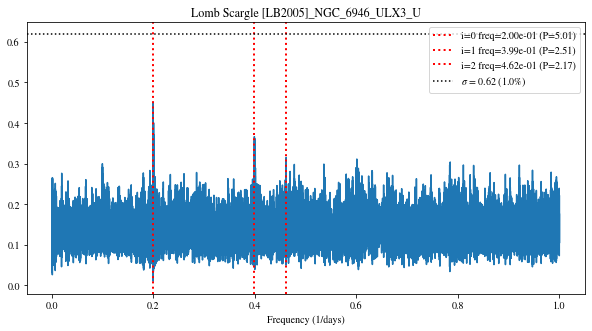

{'ndata': 89, 'mean': 18.34768, 'std': 0.17752255, 'max': 18.832008, 'min': 17.497402, 'max/min': 1.0762745, 'sigma_xs': 0.0017199005638615476, 'F_var': 0.0022603231486602875, 'kurtosis': 4.92231900055955, 'von_neumann': 1.9763958908423434, 'skew': -0.8304850600981506, 't_diff_max': 1933.9324665479144, 't_diff_min': 1.3297076565941097, 't_diff_mean': 61.491656199611995, 'y_diff_max': 0.6053829, 'y_diff_min': -0.97646904, 'y_diff_mean': -0.000790661, 'ls_z_fal': <Quantity 0.61918549>, 'ls_pow[0]': 0.45134236736862365, 'ls_freq[0]': 0.19962266067430187, 'ls_period[0]': 5.009451314906422, 'ls_fap[0]': 0.06499999999999995, 'ls_pow[1]': 0.36620877381591627, 'ls_freq[1]': 0.39916931958396984, 'ls_period[1]': 2.505202556755213, 'ls_fap[1]': 0.17800000000000005, 'ls_pow[2]': 0.31481674677461313, 'ls_freq[2]': 0.46166856022413444, 'ls_period[2]': 2.1660560977219507, 'ls_fap[2]': 0.30900000000000005, 'simbad_name': '[LB2005]_NGC_6946_ULX3', 'readable_name': 'NGC6946 ULX-3', 'FILTER': 'U'}
Calcul

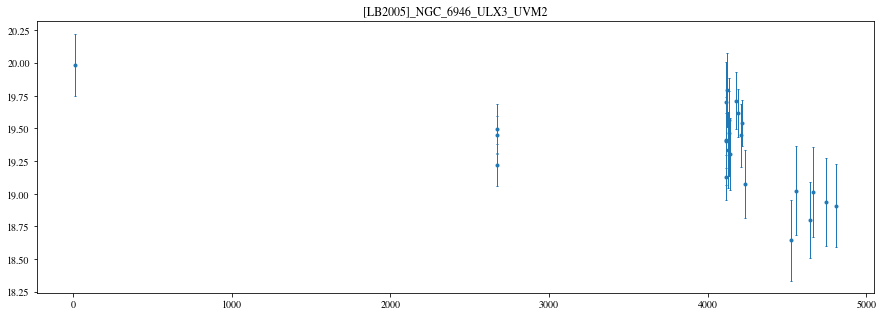

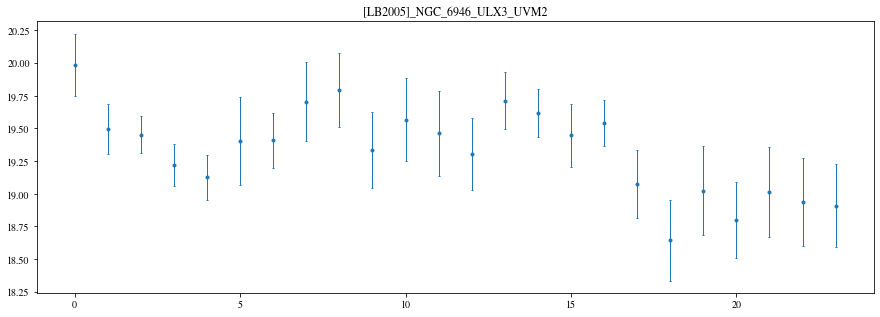

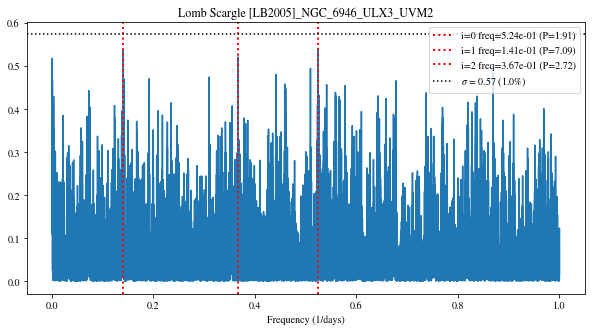

{'ndata': 24, 'mean': 19.332525, 'std': 0.32888994, 'max': 19.984934, 'min': 18.642653, 'max/min': 1.0720005, 'sigma_xs': 0.040468146403630584, 'F_var': 0.010405622590709368, 'kurtosis': -0.6187461558635028, 'von_neumann': 0.660355481024524, 'skew': -0.19629420750295926, 't_diff_max': 2658.6041147805663, 't_diff_min': 1.096093462947465, 't_diff_mean': 208.45696333331358, 'y_diff_max': 0.40791512, 'y_diff_min': -0.49154854, 'y_diff_mean': -0.04674041, 'ls_z_fal': <Quantity 0.57362103>, 'ls_pow[0]': 0.540560476429964, 'ls_freq[0]': 0.5240565622044191, 'ls_period[0]': 1.9081909704432425, 'ls_fap[0]': 0.020000000000000018, 'ls_pow[1]': 0.5379244600013823, 'ls_freq[1]': 0.1409934462682854, 'ls_period[1]': 7.092528244874434, 'ls_fap[1]': 0.02100000000000002, 'ls_pow[2]': 0.5204420316616233, 'ls_freq[2]': 0.3672105079825022, 'ls_period[2]': 2.72323361739869, 'ls_fap[2]': 0.029000000000000026, 'simbad_name': '[LB2005]_NGC_6946_ULX3', 'readable_name': 'NGC6946 ULX-3', 'FILTER': 'UVM2'}
Calculat

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.47 freq=6.67e-01 p=1.50 fap=0.17
pow=0.46 freq=4.58e-01 p=2.18 fap=0.18
pow=0.45 freq=9.54e-01 p=1.05 fap=0.24
LS success


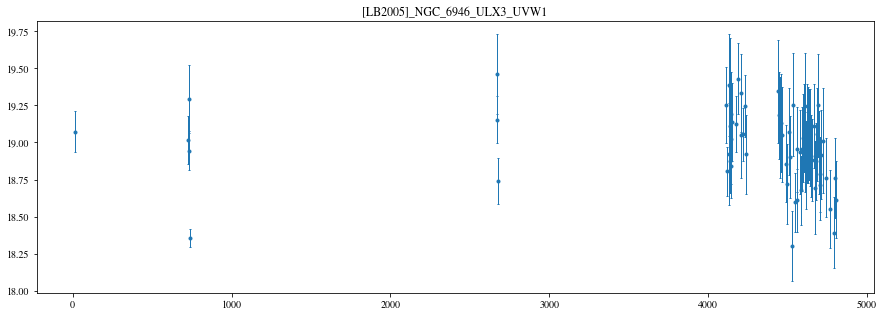

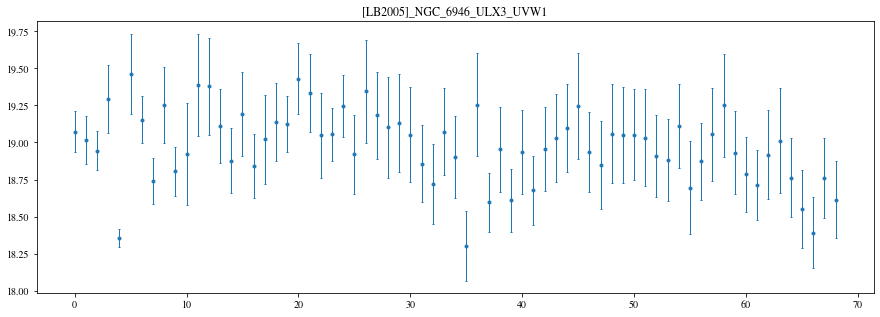

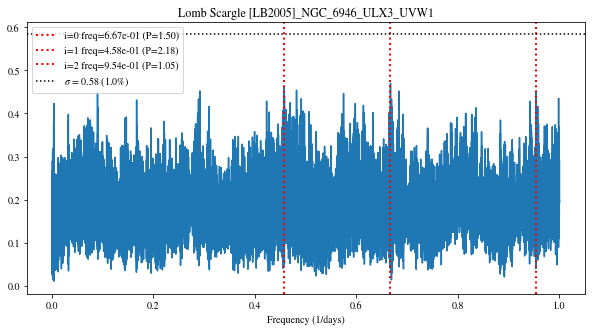

{'ndata': 69, 'mean': 18.975012, 'std': 0.24708553, 'max': 19.457521, 'min': 18.302816, 'max/min': 1.0630889, 'sigma_xs': -0.011829731527014054, 'F_var': nan, 'kurtosis': 0.1864468974667144, 'von_neumann': 1.8055079780374745, 'skew': -0.46358038360775267, 't_diff_max': 1933.9356822745249, 't_diff_min': 1.228938971995376, 't_diff_mean': 70.42731585706872, 'y_diff_max': 1.102602, 'y_diff_min': -0.9386883, 'y_diff_mean': -0.0067243297, 'ls_z_fal': <Quantity 0.5845342>, 'ls_pow[0]': 0.4699425511656074, 'ls_freq[0]': 0.6672271259992191, 'ls_period[0]': 1.4987400257482493, 'ls_fap[0]': 0.17200000000000004, 'ls_pow[1]': 0.46186121325318824, 'ls_freq[1]': 0.4578331054538618, 'ls_period[1]': 2.1842020336399095, 'ls_fap[1]': 0.18000000000000005, 'ls_pow[2]': 0.45265573830706196, 'ls_freq[2]': 0.9539223695261193, 'ls_period[2]': 1.0483033336316148, 'ls_fap[2]': 0.241, 'simbad_name': '[LB2005]_NGC_6946_ULX3', 'readable_name': 'NGC6946 ULX-3', 'FILTER': 'UVW1'}
Calculating Lomb scargle periodogram 

/mnt/d/anticorr_data/notebooks/../lightcurve.py:85: RuntimeWarning: invalid value encountered in sqrt
  F_var = np.sqrt((S2 - sigma_err_2) / np.mean(y)**2)


pow=0.43 freq=1.77e-02 p=56.38 fap=0.01
pow=0.37 freq=2.35e-01 p=4.26 fap=0.05
pow=0.37 freq=6.13e-01 p=1.63 fap=0.05
LS success


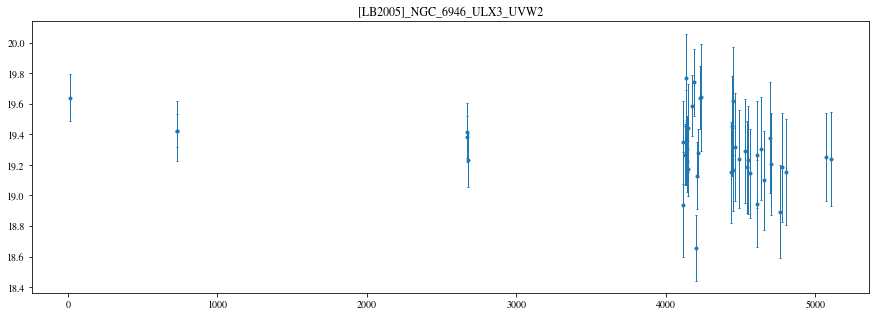

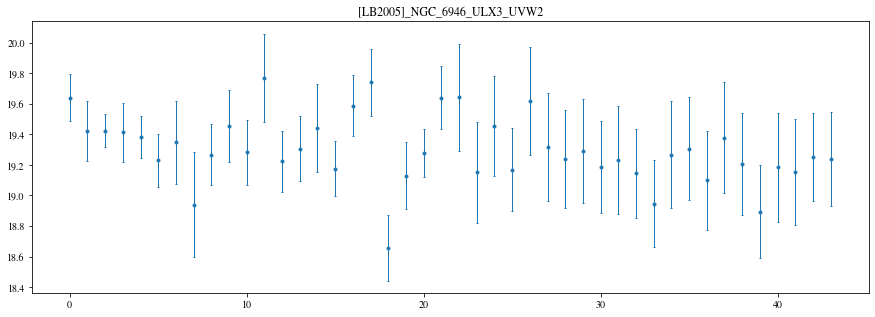

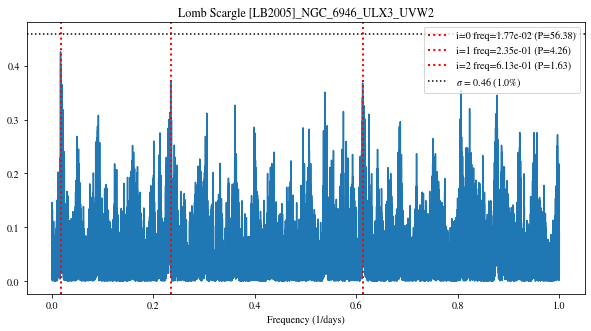

{'ndata': 44, 'mean': 19.29782, 'std': 0.22055696, 'max': 19.770573, 'min': 18.65588, 'max/min': 1.0597502, 'sigma_xs': -0.027205297892743896, 'F_var': nan, 'kurtosis': 0.6737523319462366, 'von_neumann': 1.92531849889144, 'skew': -0.13912427869721555, 't_diff_max': 1941.8344865587933, 't_diff_min': 1.2131239690934308, 't_diff_mean': 118.37515408004181, 'y_diff_max': 0.48908806, 'y_diff_min': -1.0842552, 'y_diff_mean': -0.009279561, 'ls_z_fal': <Quantity 0.45897675>, 'ls_pow[0]': 0.4260596687035061, 'ls_freq[0]': 0.017738270494646602, 'ls_period[0]': 56.37528192513466, 'ls_fap[0]': 0.01200000000000001, 'ls_pow[1]': 0.37046765219555444, 'ls_freq[1]': 0.23462853605908146, 'ls_period[1]': 4.262056170985917, 'ls_fap[1]': 0.04600000000000004, 'ls_pow[2]': 0.36813667570125214, 'ls_freq[2]': 0.6126148322057958, 'ls_period[2]': 1.6323470269228966, 'ls_fap[2]': 0.05300000000000005, 'simbad_name': '[LB2005]_NGC_6946_ULX3', 'readable_name': 'NGC6946 ULX-3', 'FILTER': 'UVW2'}
Calculating Lomb scarg

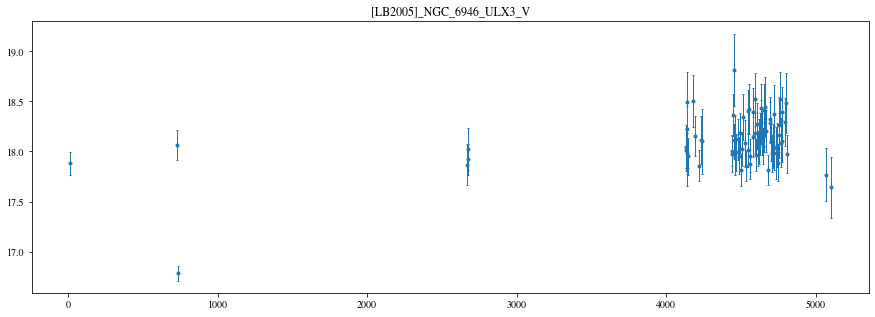

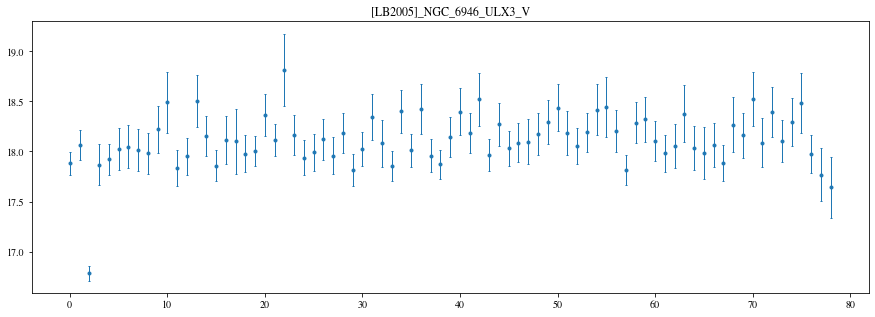

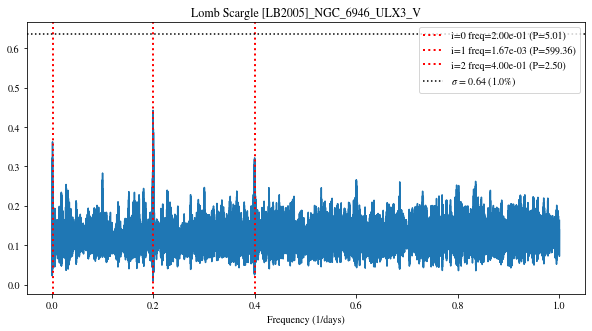

{'ndata': 79, 'mean': 18.111704, 'std': 0.260724, 'max': 18.811731, 'min': 16.784979, 'max/min': 1.120748, 'sigma_xs': 0.021983268706104425, 'F_var': 0.008186284342788896, 'kurtosis': 6.985788837020859, 'von_neumann': 1.7440556916847232, 'skew': -1.2623139638149143, 't_diff_max': 1933.9319885826408, 't_diff_min': 0.9944924625015119, 't_diff_mean': 65.21045060919697, 'y_diff_max': 1.0823841, 'y_diff_min': -1.2811165, 'y_diff_mean': -0.0030878263, 'ls_z_fal': <Quantity 0.6364666>, 'ls_pow[0]': 0.442421300458811, 'ls_freq[0]': 0.1996467818092213, 'ls_period[0]': 5.0088460777473545, 'ls_fap[0]': 0.04500000000000004, 'ls_pow[1]': 0.36257224846711517, 'ls_freq[1]': 0.0016684472071965086, 'ls_period[1]': 599.3596894685686, 'ls_fap[1]': 0.10399999999999998, 'ls_pow[2]': 0.3218363683788519, 'ls_freq[2]': 0.3997090988807411, 'ls_period[2]': 2.501819455199253, 'ls_fap[2]': 0.16700000000000004, 'simbad_name': '[LB2005]_NGC_6946_ULX3', 'readable_name': 'NGC6946 ULX-3', 'FILTER': 'V'}


Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.61 freq=1.33e-02 p=75.27 fap=0.00
pow=0.55 freq=7.61e-01 p=1.31 fap=0.00
pow=0.51 freq=7.92e-01 p=1.26 fap=0.02
LS success


<Figure size 1440x288 with 0 Axes>

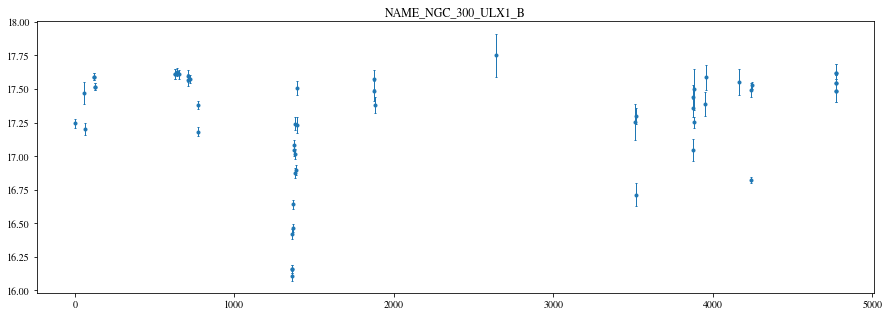

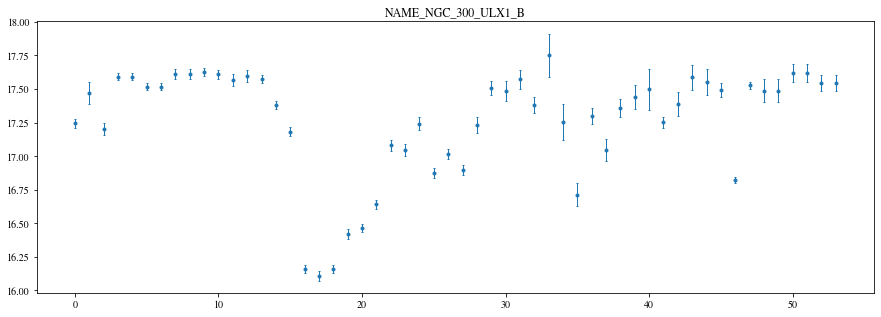

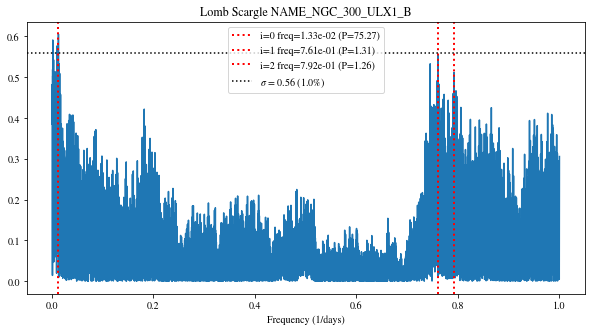

{'ndata': 54, 'mean': 17.26835, 'std': 0.41017544, 'max': 17.750267, 'min': 16.106634, 'max/min': 1.102047, 'sigma_xs': 0.16733186885162638, 'F_var': 0.023688549739366776, 'kurtosis': 1.1705488176701335, 'von_neumann': 0.49887870806441914, 'skew': -1.4196882088903189, 't_diff_max': 869.3418972407453, 't_diff_min': 0.0, 't_diff_mean': 90.00176703953967, 'y_diff_max': 0.7070751, 'y_diff_min': -1.0213776, 'y_diff_mean': 0.005628226, 'ls_z_fal': <Quantity 0.55811489>, 'ls_pow[0]': 0.6055741771340607, 'ls_freq[0]': 0.013284874105557846, 'ls_period[0]': 75.27357745766226, 'ls_fap[0]': 0.0010000000000000009, 'ls_pow[1]': 0.5534197219923939, 'ls_freq[1]': 0.7607335112379119, 'ls_period[1]': 1.3145207687416571, 'ls_fap[1]': 0.0020000000000000018, 'ls_pow[2]': 0.5115836036265065, 'ls_freq[2]': 0.7923052184102158, 'ls_period[2]': 1.2621398632291354, 'ls_fap[2]': 0.017000000000000015, 'simbad_name': 'NAME_NGC_300_ULX1', 'readable_name': 'NGC300 ULX-1', 'FILTER': 'B'}
Calculating Lomb scargle perio

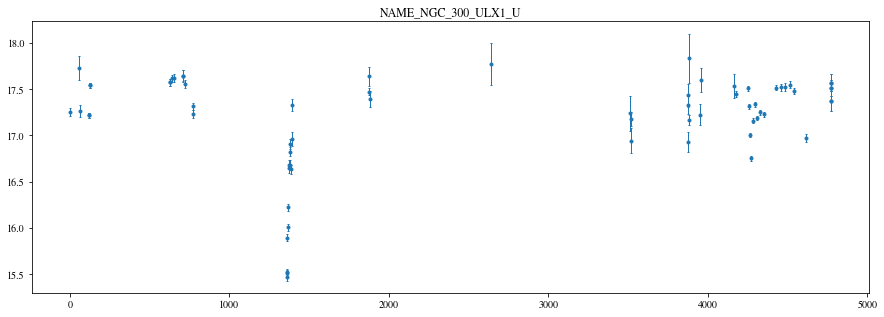

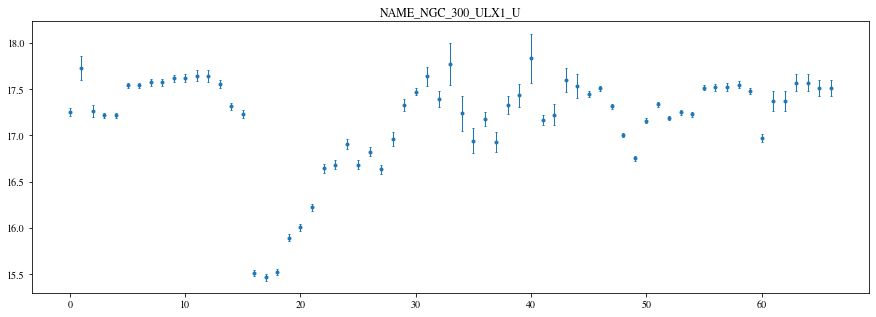

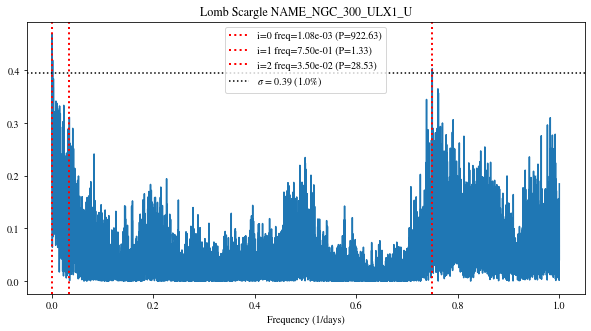

{'ndata': 67, 'mean': 17.181273, 'std': 0.5314676, 'max': 17.834455, 'min': 15.4647045, 'max/min': 1.1532362, 'sigma_xs': 0.2803159267155092, 'F_var': 0.03081545331018591, 'kurtosis': 2.774194701238012, 'von_neumann': 0.3750024223494986, 'skew': -1.7604246190469386, 't_diff_max': 869.3418606559062, 't_diff_min': 0.0, 't_diff_mean': 72.27415399236469, 'y_diff_max': 0.4734745, 'y_diff_min': -1.7163296, 'y_diff_mean': 0.0038599824, 'ls_z_fal': <Quantity 0.39480072>, 'ls_pow[0]': 0.4687496860143773, 'ls_freq[0]': 0.0010838557869697974, 'ls_period[0]': 922.631970066573, 'ls_fap[0]': 0.0010000000000000009, 'ls_pow[1]': 0.403193027755791, 'ls_freq[1]': 0.7497902497468052, 'ls_period[1]': 1.3337063269863638, 'ls_fap[1]': 0.008000000000000007, 'ls_pow[2]': 0.31095239643382055, 'ls_freq[2]': 0.03504544950973772, 'ls_period[2]': 28.534375046955535, 'ls_fap[2]': 0.08799999999999997, 'simbad_name': 'NAME_NGC_300_ULX1', 'readable_name': 'NGC300 ULX-1', 'FILTER': 'U'}
Calculating Lomb scargle periodo

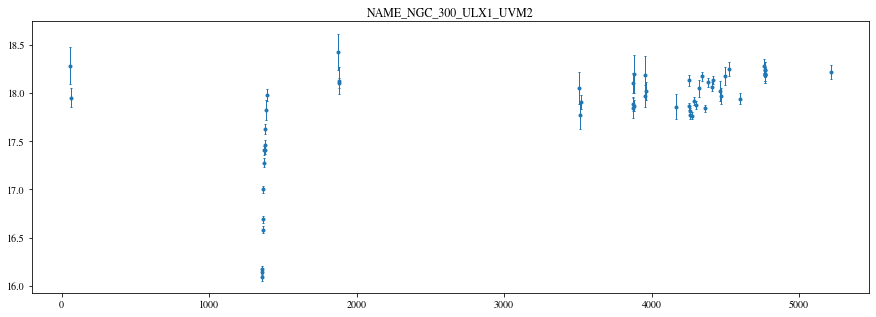

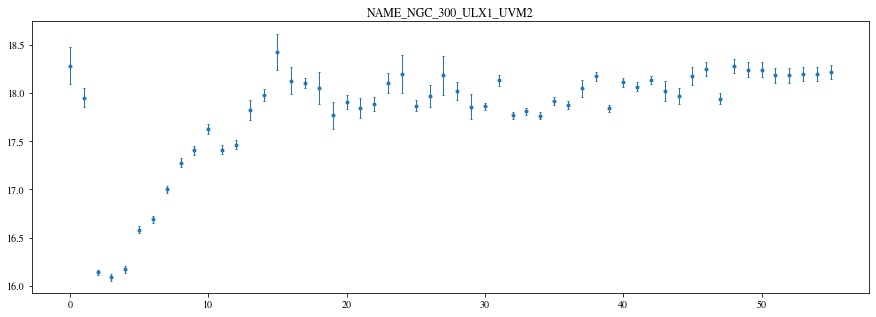

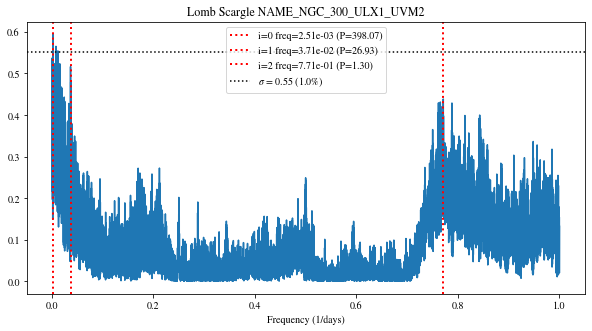

{'ndata': 56, 'mean': 17.818384, 'std': 0.539174, 'max': 18.424988, 'min': 16.087715, 'max/min': 1.1452831, 'sigma_xs': 0.2879805250891617, 'F_var': 0.03011710626959155, 'kurtosis': 3.1862508050820013, 'von_neumann': 0.33937084157900815, 'skew': -1.9573647702040928, 't_diff_max': 1630.4633954740784, 't_diff_min': 0.0, 't_diff_mean': 93.7880148152338, 'y_diff_max': 0.44143486, 'y_diff_min': -1.8075619, 'y_diff_mean': -0.0011876887, 'ls_z_fal': <Quantity 0.55182144>, 'ls_pow[0]': 0.5946620712415128, 'ls_freq[0]': 0.0025121141235110844, 'ls_period[0]': 398.0710870739976, 'ls_fap[0]': 0.0040000000000000036, 'ls_pow[1]': 0.5163479278591283, 'ls_freq[1]': 0.0371356503362136, 'ls_period[1]': 26.928301805578702, 'ls_fap[1]': 0.02100000000000002, 'ls_pow[2]': 0.4383920614816424, 'ls_freq[2]': 0.7712088990653253, 'ls_period[2]': 1.2966655353847194, 'ls_fap[2]': 0.11699999999999999, 'simbad_name': 'NAME_NGC_300_ULX1', 'readable_name': 'NGC300 ULX-1', 'FILTER': 'UVM2'}
Calculating Lomb scargle per

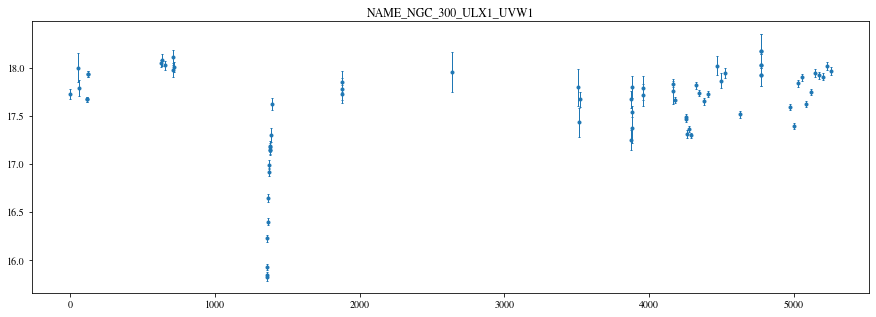

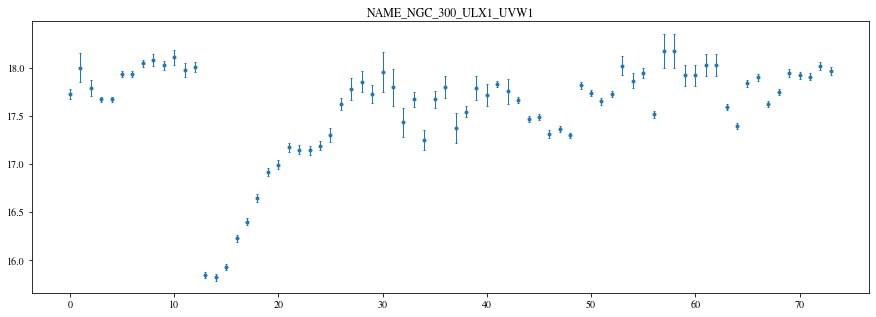

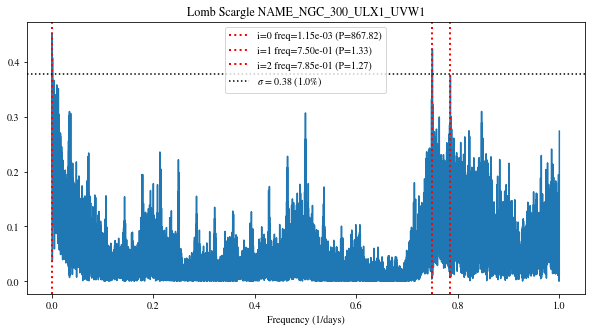

{'ndata': 74, 'mean': 17.584038, 'std': 0.52040386, 'max': 18.177616, 'min': 15.820069, 'max/min': 1.1490226, 'sigma_xs': 0.26784851905461904, 'F_var': 0.02943242300247889, 'kurtosis': 3.2546920919253823, 'von_neumann': 0.4100099571743187, 'skew': -1.8424974956245495, 't_diff_max': 869.3417796880822, 't_diff_min': 0.0, 't_diff_mean': 71.94724327359998, 'y_diff_max': 0.66166496, 'y_diff_min': -2.1668482, 'y_diff_mean': 0.0032536495, 'ls_z_fal': <Quantity 0.37755227>, 'ls_pow[0]': 0.45076121915806744, 'ls_freq[0]': 0.0011523186102894126, 'ls_period[0]': 867.8155425684249, 'ls_fap[0]': 0.0020000000000000018, 'ls_pow[1]': 0.42317545250484573, 'ls_freq[1]': 0.7499886864456143, 'ls_period[1]': 1.3333534466223116, 'ls_fap[1]': 0.0040000000000000036, 'ls_pow[2]': 0.3747338559566803, 'ls_freq[2]': 0.7854408429904751, 'ls_period[2]': 1.273170358944686, 'ls_fap[2]': 0.01100000000000001, 'simbad_name': 'NAME_NGC_300_ULX1', 'readable_name': 'NGC300 ULX-1', 'FILTER': 'UVW1'}
Calculating Lomb scargle

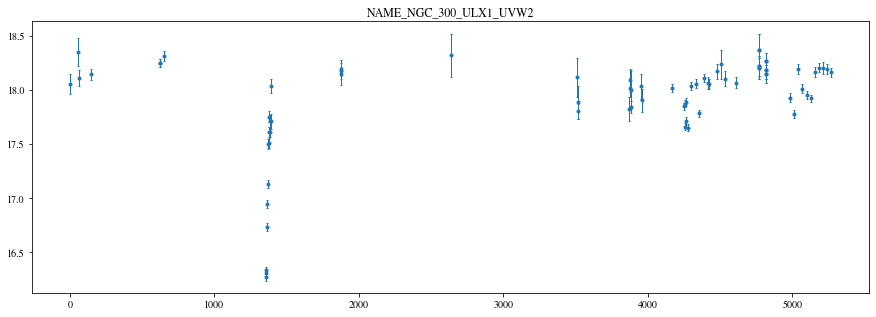

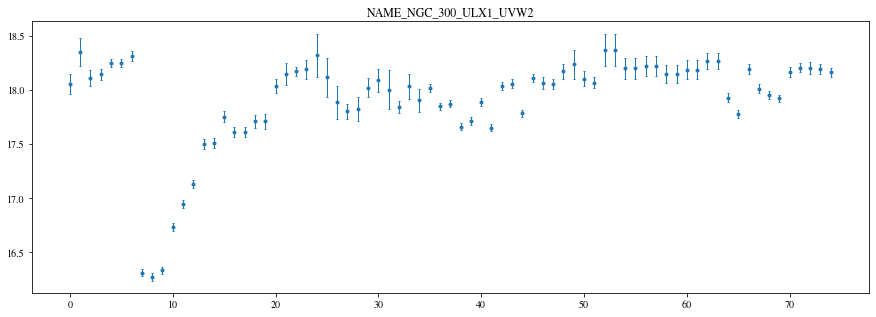

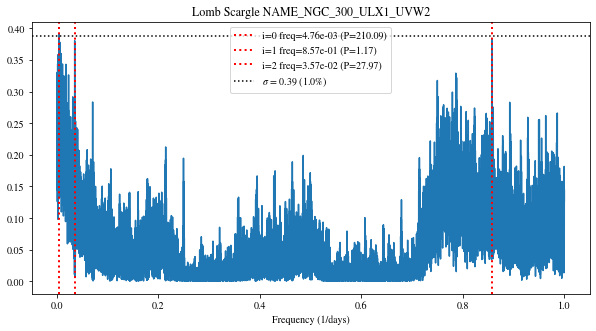

{'ndata': 75, 'mean': 17.91651, 'std': 0.44403756, 'max': 18.36815, 'min': 16.272787, 'max/min': 1.1287649, 'sigma_xs': 0.19363299588362376, 'F_var': 0.02456044747855705, 'kurtosis': 5.171261082710878, 'von_neumann': 0.4162077174517194, 'skew': -2.2621059050018175, 't_diff_max': 869.3420095494221, 't_diff_min': 0.0, 't_diff_mean': 71.16478555010188, 'y_diff_max': 0.41427803, 'y_diff_min': -1.996479, 'y_diff_mean': 0.0014703854, 'ls_z_fal': <Quantity 0.3875046>, 'ls_pow[0]': 0.39087145036894555, 'ls_freq[0]': 0.004759831010510007, 'ls_period[0]': 210.0914922802799, 'ls_fap[0]': 0.013000000000000012, 'ls_pow[1]': 0.3836247539315167, 'ls_freq[1]': 0.8571401057568394, 'ls_period[1]': 1.1666704116207676, 'ls_fap[1]': 0.01100000000000001, 'ls_pow[2]': 0.38033691661223235, 'ls_freq[2]': 0.03574995327895613, 'ls_period[2]': 27.972064528225285, 'ls_fap[2]': 0.02200000000000002, 'simbad_name': 'NAME_NGC_300_ULX1', 'readable_name': 'NGC300 ULX-1', 'FILTER': 'UVW2'}
Calculating Lomb scargle period

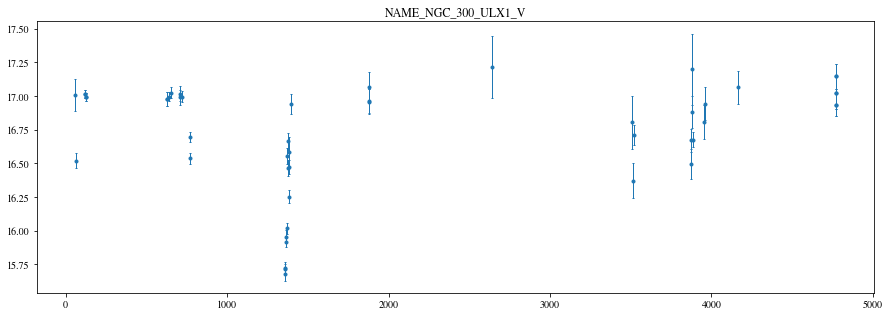

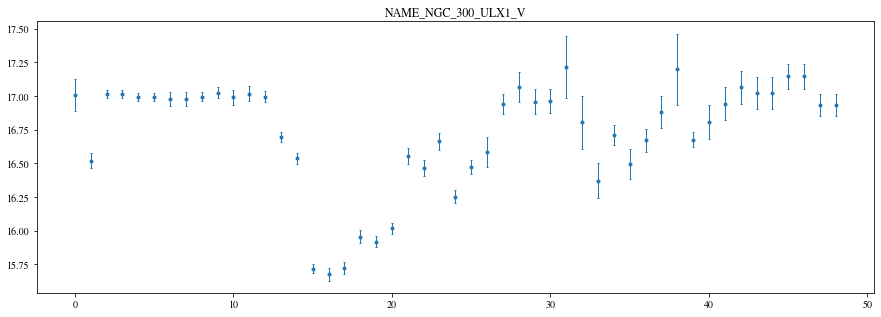

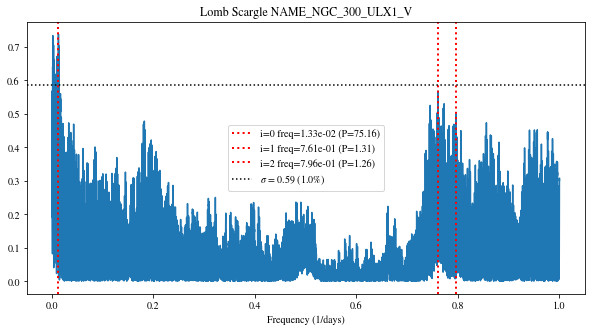

{'ndata': 49, 'mean': 16.72988, 'std': 0.40415317, 'max': 17.21593, 'min': 15.676574, 'max/min': 1.0981947, 'sigma_xs': 0.15773543137676863, 'F_var': 0.02373951374946785, 'kurtosis': 0.6157059570006349, 'von_neumann': 0.40807171274227566, 'skew': -1.2413340037426566, 't_diff_max': 869.3421335423627, 't_diff_min': 0.0, 't_diff_mean': 98.19662589221404, 'y_diff_max': 0.5362778, 'y_diff_min': -0.81842804, 'y_diff_mean': -0.0015245676, 'ls_z_fal': <Quantity 0.58581571>, 'ls_pow[0]': 0.7377937429045035, 'ls_freq[0]': 0.01330524289764972, 'ls_period[0]': 75.15834229352123, 'ls_fap[0]': 0.0, 'ls_pow[1]': 0.5675432577387531, 'ls_freq[1]': 0.7607851011217789, 'ls_period[1]': 1.3144316292807237, 'ls_fap[1]': 0.014000000000000012, 'ls_pow[2]': 0.49934349372833753, 'ls_freq[2]': 0.7963005780367196, 'ls_period[2]': 1.255807200925939, 'ls_fap[2]': 0.05700000000000005, 'simbad_name': 'NAME_NGC_300_ULX1', 'readable_name': 'NGC300 ULX-1', 'FILTER': 'V'}


Calculating Lomb scargle periodogram using autopower
min(frequency) = 0.00 max(frequency) = 1.00
pow=0.83 freq=9.91e-03 p=100.96 fap=0.00
pow=0.36 freq=9.49e-01 p=1.05 fap=0.06
pow=0.29 freq=3.66e-02 p=27.31 fap=0.14
LS success


<Figure size 1440x288 with 0 Axes>

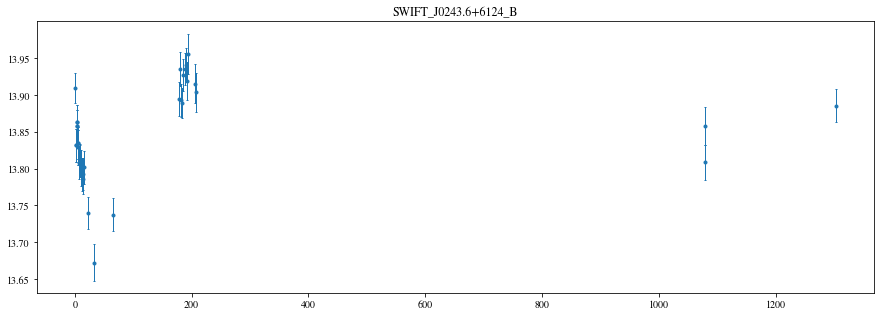

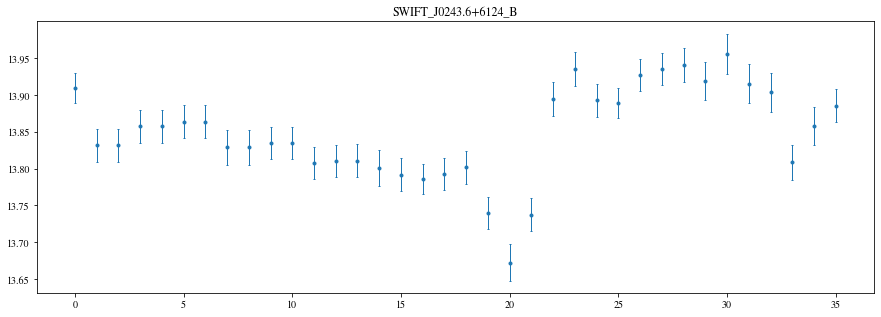

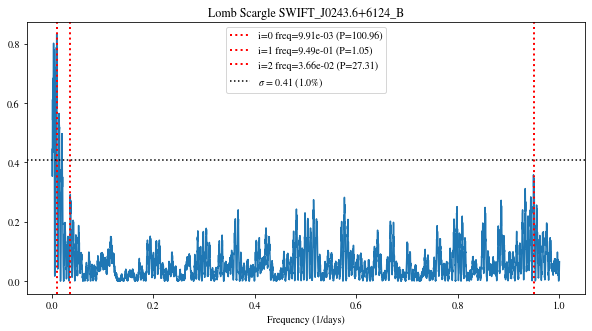

{'ndata': 36, 'mean': 13.848787, 'std': 0.063072614, 'max': 13.955885, 'min': 13.672424, 'max/min': 1.0207323, 'sigma_xs': 0.0035634335233933395, 'F_var': 0.004310449737675244, 'kurtosis': 0.07792587823602304, 'von_neumann': 0.4844364575305687, 'skew': -0.45606449248472625, 't_diff_max': 871.3990906062536, 't_diff_min': 0.0, 't_diff_mean': 37.21789519300593, 'y_diff_max': 0.15731049, 'y_diff_min': -0.09540272, 'y_diff_mean': -0.00068705424, 'ls_z_fal': <Quantity 0.4076009>, 'ls_pow[0]': 0.8328388765259419, 'ls_freq[0]': 0.009905086376052086, 'ls_period[0]': 100.958231158664, 'ls_fap[0]': 0.0, 'ls_pow[1]': 0.3584449576007807, 'ls_freq[1]': 0.9489310911335443, 'ls_period[1]': 1.0538172996370594, 'ls_fap[1]': 0.05700000000000005, 'ls_pow[2]': 0.2918036252033135, 'ls_freq[2]': 0.03662034550420834, 'ls_period[2]': 27.30722461056742, 'ls_fap[2]': 0.14200000000000002, 'simbad_name': 'SWIFT_J0243.6+6124', 'readable_name': 'Swift J0243.6+6124', 'FILTER': 'B'}
Calculating Lomb scargle periodogra

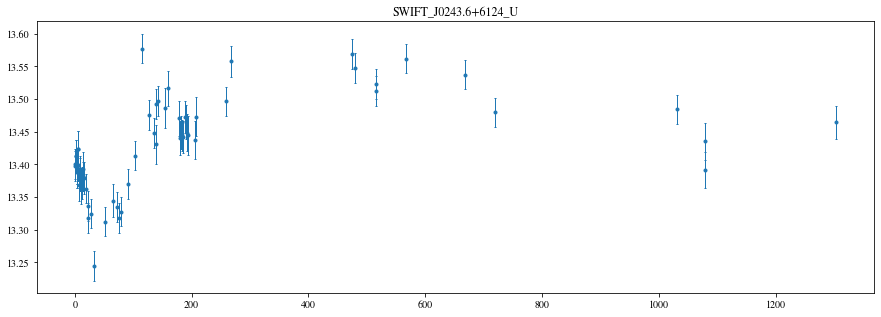

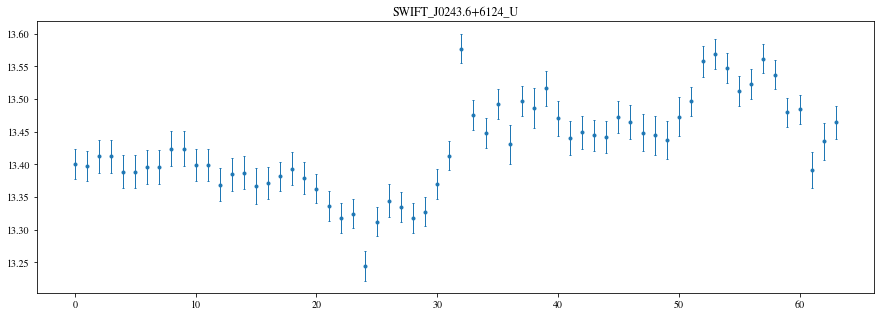

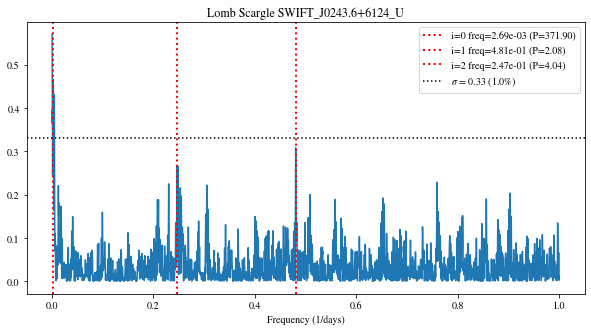

{'ndata': 64, 'mean': 13.427218, 'std': 0.07044377, 'max': 13.577452, 'min': 13.244698, 'max/min': 1.0251236, 'sigma_xs': 0.004424407961778343, 'F_var': 0.004953834899517178, 'kurtosis': -0.28834267971204763, 'von_neumann': 0.3199876997187036, 'skew': 0.08665651019698316, 't_diff_max': 311.96068266678776, 't_diff_min': 0.0, 't_diff_mean': 20.676637740676394, 'y_diff_max': 0.16417313, 'y_diff_min': -0.101875305, 'y_diff_mean': 0.0010140889, 'ls_z_fal': <Quantity 0.33185048>, 'ls_pow[0]': 0.466835882336385, 'ls_freq[0]': 0.0026888932987367106, 'ls_period[0]': 371.90021652023813, 'ls_fap[0]': 0.0, 'ls_pow[1]': 0.30802858068769723, 'ls_freq[1]': 0.48079923259565643, 'ls_period[1]': 2.0798702081976534, 'ls_fap[1]': 0.013000000000000012, 'ls_pow[2]': 0.2669635873745958, 'ls_freq[2]': 0.24742488586112912, 'ls_period[2]': 4.041630640829172, 'ls_fap[2]': 0.07399999999999995, 'simbad_name': 'SWIFT_J0243.6+6124', 'readable_name': 'Swift J0243.6+6124', 'FILTER': 'U'}
Calculating Lomb scargle perio

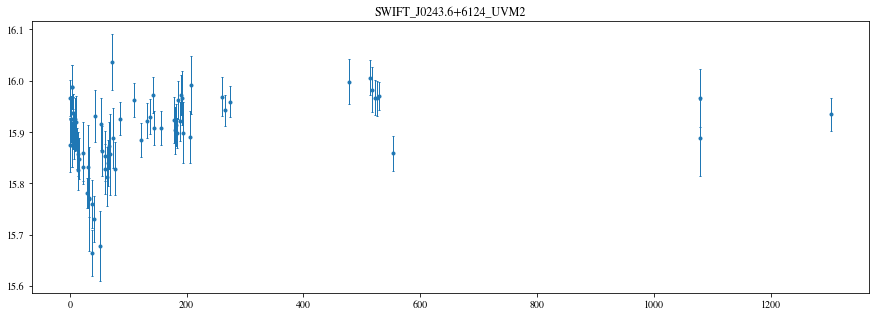

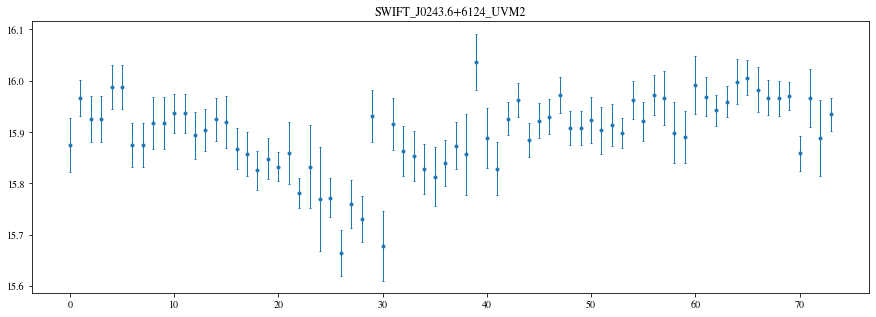

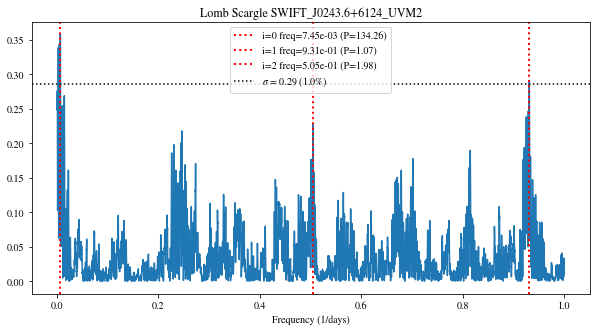

{'ndata': 74, 'mean': 15.897637, 'std': 0.07262406, 'max': 16.036266, 'min': 15.663839, 'max/min': 1.0237762, 'sigma_xs': 0.00317391225866772, 'F_var': 0.003543764653585052, 'kurtosis': 1.132530603106293, 'von_neumann': 0.9841831471255214, 'skew': -0.9546685746650168, 't_diff_max': 525.5573121325215, 't_diff_min': 0.0, 't_diff_mean': 17.844901096293157, 'y_diff_max': 0.23744011, 'y_diff_min': -0.25246906, 'y_diff_mean': 0.0008151172, 'ls_z_fal': <Quantity 0.28579066>, 'ls_pow[0]': 0.3581592932311844, 'ls_freq[0]': 0.007448256144977324, 'ls_period[0]': 134.25961467159564, 'ls_fap[0]': 0.0010000000000000009, 'ls_pow[1]': 0.2904131831086199, 'ls_freq[1]': 0.9310841839588722, 'ls_period[1]': 1.0740167400847742, 'ls_fap[1]': 0.0050000000000000044, 'ls_pow[2]': 0.22854124049070182, 'ls_freq[2]': 0.505345748482155, 'ls_period[2]': 1.9788432038927355, 'ls_fap[2]': 0.06599999999999995, 'simbad_name': 'SWIFT_J0243.6+6124', 'readable_name': 'Swift J0243.6+6124', 'FILTER': 'UVM2'}
Calculating Lomb

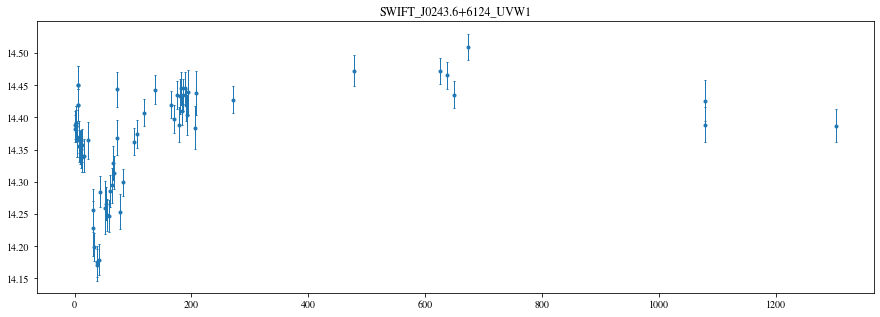

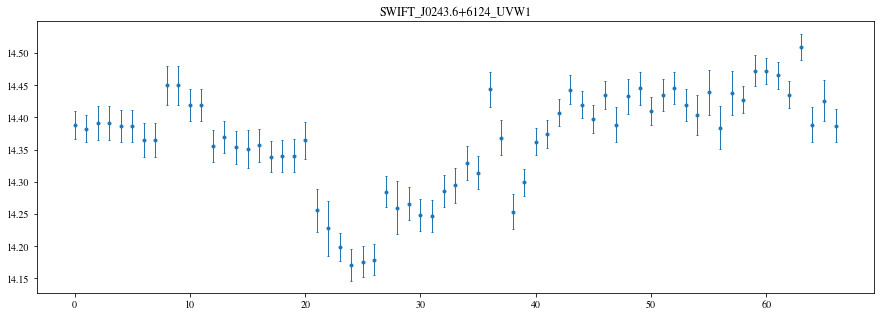

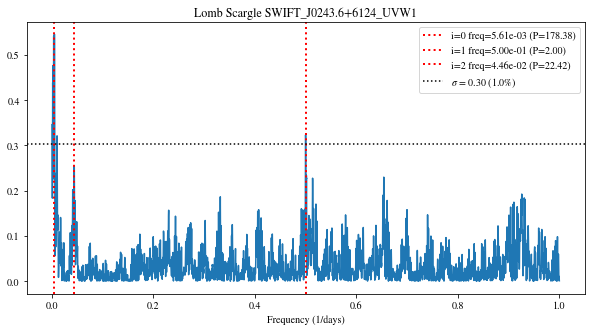

{'ndata': 67, 'mean': 14.366188, 'std': 0.07825025, 'max': 14.509719, 'min': 14.171226, 'max/min': 1.023886, 'sigma_xs': 0.00552993602772702, 'F_var': 0.005176288893358598, 'kurtosis': -0.032174416877892575, 'von_neumann': 0.32251438763773826, 'skew': -0.8002265337700607, 't_diff_max': 405.1817859636503, 't_diff_min': 0.0, 't_diff_mean': 19.737233986756497, 'y_diff_max': 0.12926483, 'y_diff_min': -0.12084484, 'y_diff_mean': -2.2512493e-05, 'ls_z_fal': <Quantity 0.30212268>, 'ls_pow[0]': 0.54523846207827, 'ls_freq[0]': 0.005605969153027728, 'ls_period[0]': 178.3812883558073, 'ls_fap[0]': 0.0, 'ls_pow[1]': 0.32278032962257214, 'ls_freq[1]': 0.5002870561882057, 'ls_period[1]': 1.9988524340789753, 'ls_fap[1]': 0.0030000000000000027, 'ls_pow[2]': 0.25471194531035196, 'ls_freq[2]': 0.044603174648662494, 'ls_period[2]': 22.419928802758143, 'ls_fap[2]': 0.03700000000000003, 'simbad_name': 'SWIFT_J0243.6+6124', 'readable_name': 'Swift J0243.6+6124', 'FILTER': 'UVW1'}
Calculating Lomb scargle pe

In [ ]:
all_res = []
for simbad_name in source_names_w_counterparts:
    local_name    = source_names_dict[simbad_name]
    readable_name = source_names_readable[simbad_name]
    closest_src   = src_region_dict[simbad_name]
    fits_files = glob(f'../download_scripts/{local_name}/*uvotsource*fits*')
    
    for f in fits_files:
        if closest_src.split('/')[-1][:-4] in f:
            fig = plt.figure(figsize=(20,4))
            tab = read_uvotsource(f)
            for filt in np.unique(tab['FILTER']):
                try:
                    sub = tab[tab['FILTER'] == filt]
                    t = sub['MJD_0']
                    y = sub['MAG']
                    y_err = sub['MAG_ERR']
                    lc = LightCurve(t, y, y_err)
                    lc.set_name(f'{simbad_name}_{filt}')
                    res = lc.analyse()
                    lc.plot_all()
                    res['simbad_name'] = simbad_name
                    res['readable_name'] = readable_name
                    res['FILTER'] = filt
                    print(res)
                    all_res.append(res)
                    
                except:
                    print(f'Error {simbad_name} {filter}')


In [ ]:
df = pd.DataFrame(all_res)
df['mean'] = df['mean'].astype(float)
df.to_csv('../tables/uvot_lc_analysis.csv')
df.round(2).to_latex('../tables/uvot_lc_analysis.tex',
                     columns=['readable_name', 'FILTER', 'ndata', 'mean', 'std', 'sigma_xs', 'F_var', 'kurtosis', 'skew', 't_diff_mean'],
                     index=False)
df

In [ ]:
df[df['readable_name'] == 'NGC1313 X-2']

In [ ]:
df.columns

In [ ]:
x = 'mean'
y = 'skew'
fig, ax = plt.subplots(figsize=(5,5))

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



In [ ]:
x = 'mean'
y = 'von_neumann'
fig, ax = plt.subplots(figsize=(5,5))

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



In [ ]:
x = 'mean'
y = 'kurtosis'
fig, ax = plt.subplots(figsize=(5,5))

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    print(i)
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



In [ ]:
x = 'mean'
y = 'std'
fig, ax = plt.subplots(figsize=(5,5))
axins = ax.inset_axes([0, 1.1, 0.5, 0.5])

markers = ['x']*5 + ['+']*5 + ['o']*5 + ['^']*5

for i, name in enumerate(np.unique(df['readable_name'])):
    sub = df[df['readable_name'] == name]
    ax.scatter(sub[x], sub[y], label=name, marker=markers[i])
    axins.scatter(sub[x], sub[y], marker=markers[i])
ax.legend(loc='upper right', bbox_to_anchor =[1.5,1,0,0])
ax.set_xlabel(x)
ax.set_ylabel(y)



x1, x2, y1, y2 = 12.5, 20.3, 0, 0.6


axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")

In [ ]:
all_mag = []
all_mag_err = []
for name in np.unique(df['readable_name']):
    mag = {}
    mag_err = {}
    mag['readable_name'] = name    
    mag_err['readable_name'] = name    
    for filt in filters:
        
        #print(name, filt)
        sub = df[df['readable_name'] == name]
        sub = sub[sub['FILTER'] == filt]
        #print(len(sub))

        try:
            mag[filt] = sub['mean'].values[0]
            mag_err[filt] = sub['std'].values[0]
            
        except IndexError:
            mag[filt] = 0
            mag_err[filt] = 0
        #print(res)
    all_mag.append(mag)
    all_mag_err.append(mag_err)
    
    
df_mags = pd.DataFrame(all_mag)
df_mags_err = pd.DataFrame(all_mag_err)
df_mags = df_mags.set_index('readable_name')
df_mags_err = df_mags_err.set_index('readable_name')
df_mags


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
df_mags.plot.bar(ax=ax, yerr=df_mags_err, color=filter_colors, width=1.0, rot=90, error_kw=dict(lw=1, capsize=1, capthick=1))
ax.set_ylim(12.5, 22)
ax.legend(loc='upper left', ncol=7)
ax.set_xlabel('')
ax.set_ylabel('UVOT magnitude (mag)')
plt.tight_layout()
plt.savefig('../figures/UVOT_magnitudes.png')
plt.savefig('../figures/UVOT_magnitudes.pdf')